# **Problem_statement:**

Flight ticket prices can be something hard to guess, today we might see a price, check
out the price of the same flight tomorrow, it will be a different story. We might have often
heard travelers saying that flight ticket prices are so unpredictable. That’s why we will
try to use machine learning to solve this problem. This can help airlines by predicting
what prices they can maintain.

# **Task1: Data analysis report**

Import required libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# **load data**

In [ ]:
data = pd.read_excel('/content/Flight_Fare.xlsx')

In [ ]:
data

Airline Date_of_Journey    Source Destination  \
0           IndiGo      24/03/2019  Banglore   New Delhi   
1        Air India       1/05/2019   Kolkata    Banglore   
2      Jet Airways       9/06/2019     Delhi      Cochin   
3           IndiGo      12/05/2019   Kolkata    Banglore   
4           IndiGo      01/03/2019  Banglore   New Delhi   
...            ...             ...       ...         ...   
10678     Air Asia       9/04/2019   Kolkata    Banglore   
10679    Air India      27/04/2019   Kolkata    Banglore   
10680  Jet Airways      27/04/2019  Banglore       Delhi   
10681      Vistara      01/03/2019  Banglore   New Delhi   
10682    Air India       9/05/2019     Delhi      Cochin   

                       Route Dep_Time  Arrival_Time Duration Total_Stops  \
0                  BLR → DEL    22:20  01:10 22 Mar   2h 50m    non-stop   
1      CCU → IXR → BBI → BLR    05:50         13:15   7h 25m     2 stops   
2      DEL → LKO → BOM → COK    09:25  04:25 10 Jun      19h     2 stops   
3            CCU → NAG → BLR    18:05         23:30   5h 25m      1 stop   
4            BLR → NAG → DEL    16:50         21:35   4h 45m      1 stop   
...                      ...      ...           ...      ...         ...   
10678              CCU → BLR    19:55         22:25   2h 30m    non-stop   
10679              CCU → BLR    20:45         23:20   2h 35m    non-stop   
10680              BLR → DEL    08:20         11:20       3h    non-stop   
10681              BLR → DEL    11:30         14:10   2h 40m    non-stop   
10682  DEL → GOI → BOM → COK    10:55         19:15   8h 20m     2 stops   

      Additional_Info  Price  
0             No info   3897  
1             No info   7662  
2             No info  13882  
3             No info   6218  
4             No info  13302  
...               ...    ...  
10678         No info   4107  
10679         No info   4145  
10680         No info   7229  
10681         No info  12648  
10682         No info  11753  

[10683 rows x 11 columns]

Attribute Information :
1. Airline: So this column will have all the types of airlines like Indigo, Jet Airways,
Air India, and many more.
2. Date_of_Journey: This column will let us know about the date on which the
passenger’s journey will start.
3. Source: This column holds the name of the place from where the passenger’s
journey will start.
4. Destination: This column holds the name of the place to where passengers
wanted to travel.
5. Route: Here we can know about what the route is through which passengers
have opted to travel from his/her source to their destination.
6. Arrival_Time: Arrival time is when the passenger will reach his/her destination.

7. Duration: Duration is the whole period that a flight will take to complete its
journey from source to destination.
8. Total_Stops: This will let us know in how many places flights will stop there for
the flight in the whole journey.
9. Additional_Info: In this column, we will get information about food, kind of food,
and other amenities.
10. Price: Price of the flight for a complete journey including all the expenses
before onboarding.

# **Basic Checks**

In [ ]:
data.head()

Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      24/03/2019  Banglore   New Delhi              BLR → DEL   
1    Air India       1/05/2019   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways       9/06/2019     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      12/05/2019   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      01/03/2019  Banglore   New Delhi        BLR → NAG → DEL   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  Price  
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info   3897  
1    05:50         13:15   7h 25m     2 stops         No info   7662  
2    09:25  04:25 10 Jun      19h     2 stops         No info  13882  
3    18:05         23:30   5h 25m      1 stop         No info   6218  
4    16:50         21:35   4h 45m      1 stop         No info  13302

In [ ]:
data.tail()

Airline Date_of_Journey    Source Destination  \
10678     Air Asia       9/04/2019   Kolkata    Banglore   
10679    Air India      27/04/2019   Kolkata    Banglore   
10680  Jet Airways      27/04/2019  Banglore       Delhi   
10681      Vistara      01/03/2019  Banglore   New Delhi   
10682    Air India       9/05/2019     Delhi      Cochin   

                       Route Dep_Time Arrival_Time Duration Total_Stops  \
10678              CCU → BLR    19:55        22:25   2h 30m    non-stop   
10679              CCU → BLR    20:45        23:20   2h 35m    non-stop   
10680              BLR → DEL    08:20        11:20       3h    non-stop   
10681              BLR → DEL    11:30        14:10   2h 40m    non-stop   
10682  DEL → GOI → BOM → COK    10:55        19:15   8h 20m     2 stops   

      Additional_Info  Price  
10678         No info   4107  
10679         No info   4145  
10680         No info   7229  
10681         No info  12648  
10682         No info  11753

In [ ]:
data.shape

(10683, 11)

In [ ]:
data.describe()

Price
count  10683.000000
mean    9087.064121
std     4611.359167
min     1759.000000
25%     5277.000000
50%     8372.000000
75%    12373.000000
max    79512.000000

In [ ]:
data.describe(include='object')

Airline Date_of_Journey Source Destination            Route  \
count         10683           10683  10683       10683            10682   
unique           12              44      5           6              128   
top     Jet Airways      18/05/2019  Delhi      Cochin  DEL → BOM → COK   
freq           3849             504   4537        4537             2376   

       Dep_Time Arrival_Time Duration Total_Stops Additional_Info  
count     10683        10683    10683       10682           10683  
unique      222         1343      368           5              10  
top       18:55        19:00   2h 50m      1 stop         No info  
freq        233          423      550        5625            8345

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [ ]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [ ]:
data.duplicated().sum()

np.int64(220)

Insights:
1. Total 10 columns,all are object type except target(price).
2. date_of_journey,dept_time,arrival_time,duration  mentioned as object need to convert into date time columns.
3. There are two columns,route and total_stops with 1 null value.
4. There are 220 duplicates to be drop from dataset
5. No constant featutes in the dataset

# **Data Cleaning and Exploratory Data Analysis**

In [ ]:
data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [ ]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [ ]:
#changing names of columns for convinience
data = data.rename(columns={'Airline':'airline', 'Date_of_Journey':'date_of_journey', 'Source':'source', 'Destination':'destination', 'Route':'route',
       'Dep_Time':'dep_time', 'Arrival_Time':'arrival_time', 'Duration':'duration', 'Total_Stops':'total_stops',
       'Additional_Info':"additional_info", 'Price':'price'})

## **converting object columns to date time columns**

### **1. extraction columns from date of journey and relationship with price**

In [ ]:
from datetime import datetime

data['date_of_journey'] = pd.to_datetime(data['date_of_journey'])
data['year'] = data['date_of_journey'].dt.year
data['month'] = data['date_of_journey'].dt.month
data['day'] = data['date_of_journey'].dt.weekday
data['weekend'] = data['day'].apply(lambda x: 1 if x in [5, 6] else 0)

In [ ]:
pd.set_option('display.max_columns', None)
data.head(1)

airline date_of_journey    source destination      route dep_time  \
0  IndiGo      2019-03-24  Banglore   New Delhi  BLR → DEL    22:20   

   arrival_time duration total_stops additional_info  price  year  month  day  \
0  01:10 22 Mar   2h 50m    non-stop         No info   3897  2019      3    6   

   weekend  
0        1

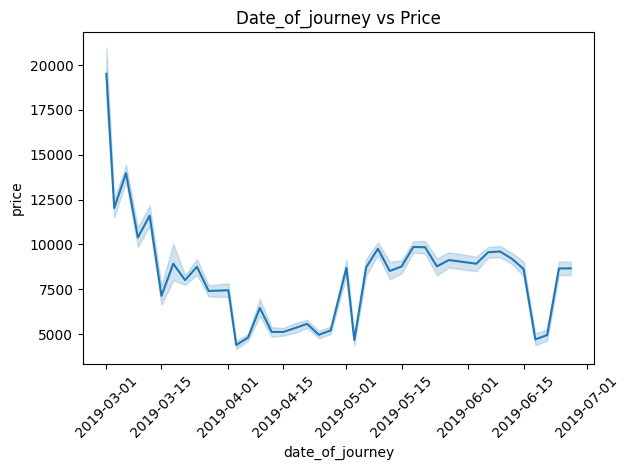

In [ ]:
#relationship with date of journey with price
sns.lineplot(x='date_of_journey',y='price',data=data)
plt.title("Date_of_journey vs Price")

plt.xticks(rotation=45)
plt.tight_layout()

In [ ]:
data.month.value_counts()

month
5    3466
6    3414
3    2724
4    1079
Name: count, dtype: int64

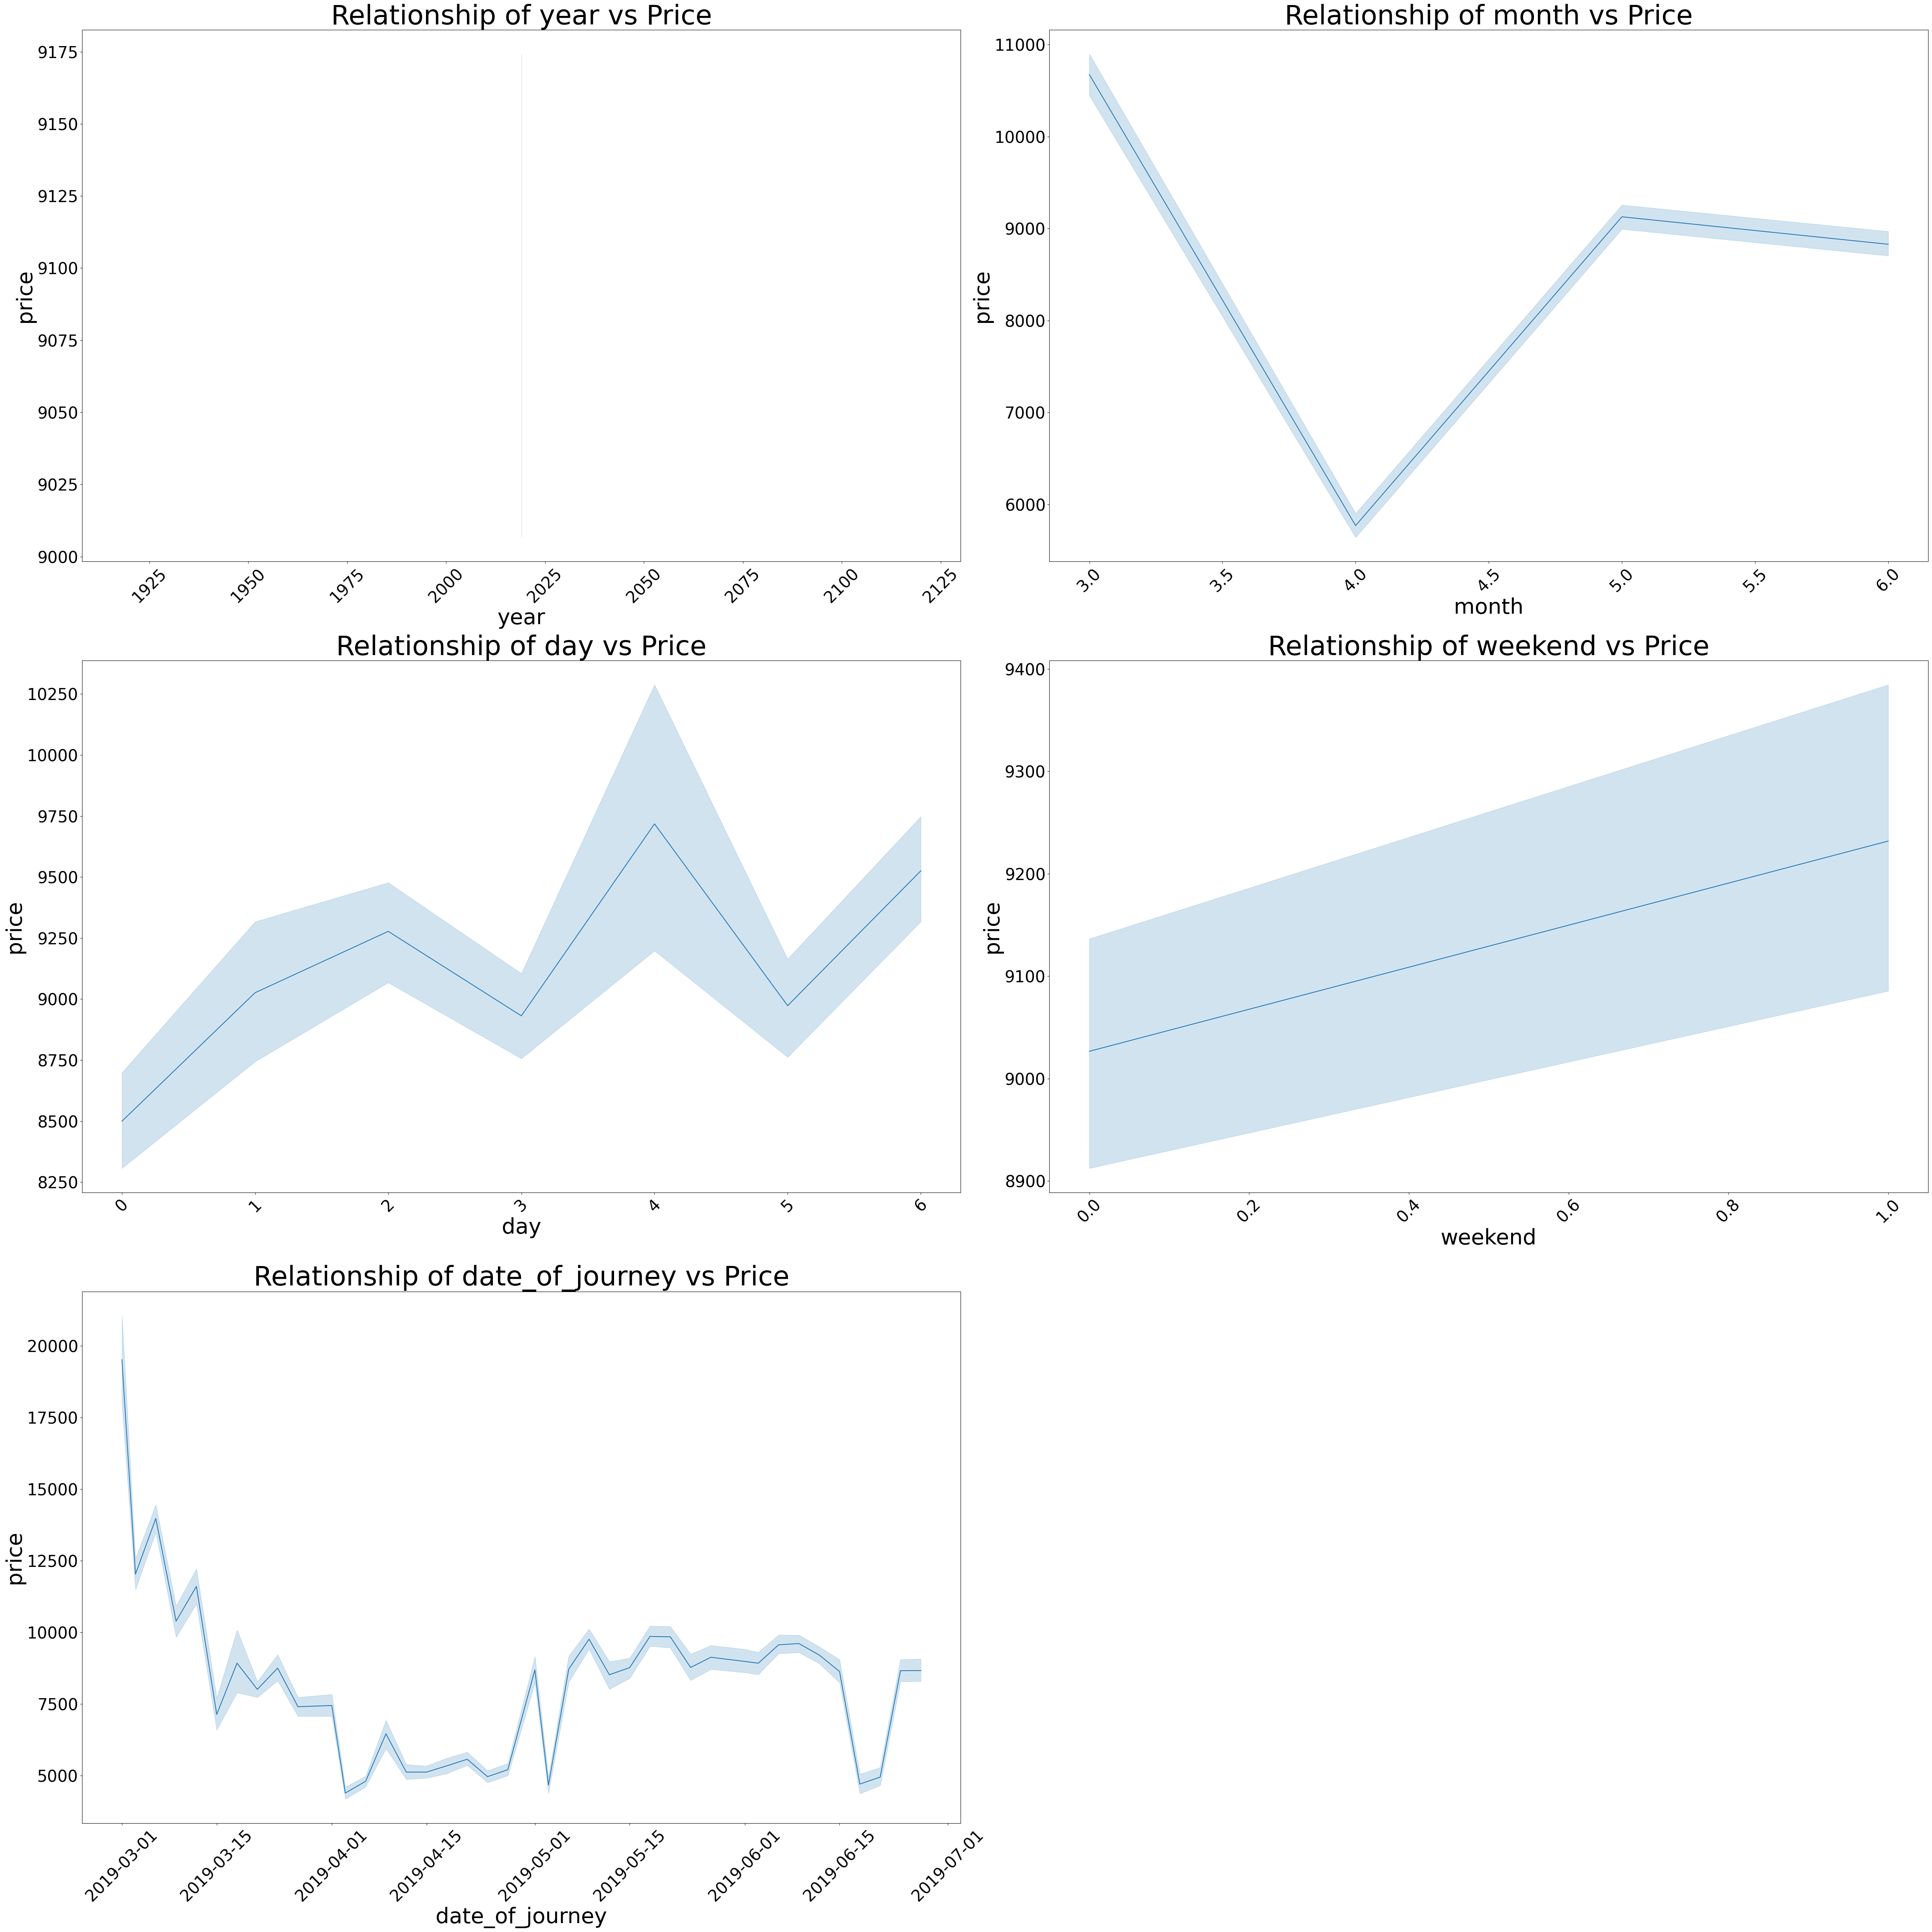

In [ ]:
#relationship with year,month,weekday,weekend
dates = data[['year','month','day','weekend','date_of_journey']]
plt.figure(figsize=(50,50))
for i,col in enumerate(dates.columns):
  plt.subplot(3,2,i+1)
  sns.lineplot(x=col,y='price',data=data)
  plt.title(f'Relationship of {col} vs Price',fontsize=('50'))
  plt.xlabel(col,fontsize=40)
  plt.ylabel('price',fontsize=40)
  plt.xticks(rotation=45,fontsize=30)
  plt.yticks(fontsize=30)
plt.tight_layout()
plt.show()

Insights;

1. This data is about prople traveled in flight in year 2020  

2. out of 4 months march,april,may,june.......price was droped from march to april then sharp increase from april to may.......they remained approximately constant from may to june......since april to may are holidays......people go for holidays so,the price of the flight was high

3. The price of the flight was high in weekends than weekday.
since most of the people likely to travel on weekends so price was increased


### **2. changing duration column to minutes from hours**

In [ ]:
#changing dyration column to minutes from hours
data.duration.unique()

array(['2h 50m', '7h 25m', '19h', '5h 25m', '4h 45m', '2h 25m', '15h 30m',
       '21h 5m', '25h 30m', '7h 50m', '13h 15m', '2h 35m', '2h 15m',
       '12h 10m', '26h 35m', '4h 30m', '22h 35m', '23h', '20h 35m',
       '5h 10m', '15h 20m', '2h 55m', '13h 20m', '15h 10m', '5h 45m',
       '5h 55m', '13h 25m', '22h', '5h 30m', '10h 25m', '5h 15m',
       '2h 30m', '6h 15m', '11h 55m', '11h 5m', '8h 30m', '22h 5m',
       '2h 45m', '12h', '16h 5m', '19h 55m', '3h 15m', '25h 20m', '3h',
       '16h 15m', '15h 5m', '6h 30m', '25h 5m', '12h 25m', '27h 20m',
       '10h 15m', '10h 30m', '1h 30m', '1h 25m', '26h 30m', '7h 20m',
       '13h 30m', '5h', '19h 5m', '14h 50m', '2h 40m', '22h 10m',
       '9h 35m', '10h', '21h 20m', '18h 45m', '12h 20m', '18h', '9h 15m',
       '17h 30m', '16h 35m', '12h 15m', '7h 30m', '24h', '8h 55m',
       '7h 10m', '14h 30m', '30h 20m', '15h', '12h 45m', '10h 10m',
       '15h 25m', '14h 5m', '20h 15m', '23h 10m', '18h 10m', '16h',
       '2h 20m', '8h', '16h 5

In [ ]:
data[data['duration']=='5m'].value_counts()

airline    date_of_journey  source  destination  route                  dep_time  arrival_time  duration  total_stops  additional_info  price  year  month  day  weekend
Air India  2019-03-06       Mumbai  Hyderabad    BOM → GOI → PNQ → HYD  16:50     16:55         5m        2 stops      No info          17327  2019  3      2    0          1
Name: count, dtype: int64

In [ ]:
#this is not possible data with 5mins and 2 stops is impossible, i think there is a mistake in data so removing it
data = data[data['duration']!='5m']

In [ ]:
#changing dyration column to minutes from hours
data['duration'] = data['duration'].str.replace('h','')
data['duration'] = data['duration'].str.replace('m','')

In [ ]:
data['duration_to_minutes'] = data['duration'].apply(lambda x: int(x.split(' ')[0])*60 + int(x.split(' ')[1]) if len(x.split(' ')) >1 else int(x.split(' ')[0]) *60)

In [ ]:
data.duration_to_minutes.head(2)

0    170
1    445
Name: duration_to_minutes, dtype: int64

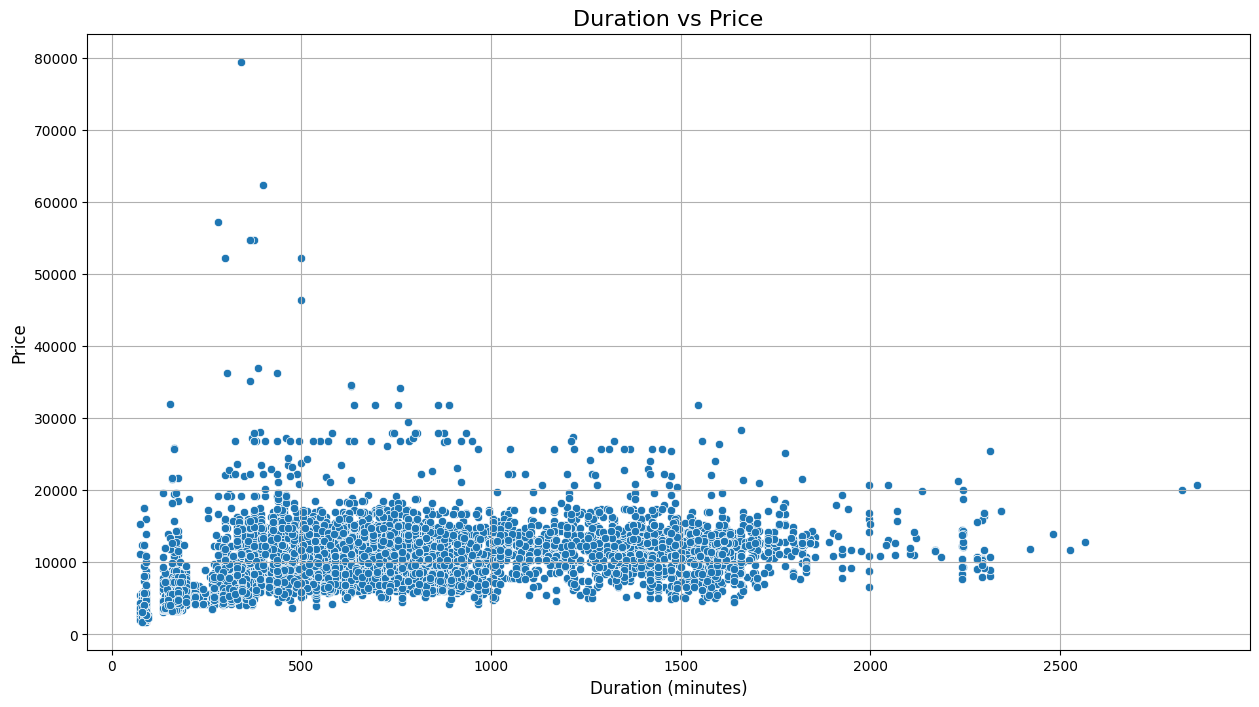

In [ ]:
#relationship with duration of time with Price
plt.figure(figsize=(15, 8))
sns.scatterplot(x='duration_to_minutes',y='price',data=data)
plt.title('Duration vs Price', fontsize=16)
plt.xlabel('Duration (minutes)', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.grid(True)
plt.show()

Insights:
1. generally increase in duration price also increases here it was showing constant.........the data is not representing actual scenario

### **3.convertion of dept_time and arrival_time to cyclic encoding:**
*  Converts the time to sin/cos features to retain the circular nature (00:00 close to 23:59).

In [ ]:
print(data['dep_time'].dtype)


object


In [ ]:
#dept_mins to cyclic pattens
data['dep_mins']= pd.to_datetime(data['dep_time'],format='%H:%M').dt.hour*60+pd.to_datetime(data['dep_time'],format='%H:%M').dt.minute

data['dep_sin'] = np.sin(2*np.pi * data['dep_mins']/1440)
data['dep_cos'] = np.cos(2*np.pi * data['dep_mins']/1440)


In [ ]:
#arrival_time to cyclic_pattern

# arrival_time column has month and date also
# Extract the time string
arrival_time_series = pd.to_datetime(data['arrival_time'].str.extract(r'(\d{2}:\d{2})')[0], format='%H:%M')

# Extract hour and minute
data['arrival_hour'] = arrival_time_series.dt.hour
data['arrival_minute'] = arrival_time_series.dt.minute

# Calculate total minutes from midnight
data['arrival_total_minutes'] = data['arrival_hour'] * 60 + data['arrival_minute']

# Create sine and cosine features
data['arrival_sin'] = np.sin(2 * np.pi * data['arrival_total_minutes'] / 1440)
data['arrival_cos'] = np.cos(2 * np.pi * data['arrival_total_minutes'] / 1440)

data.head(2)

airline date_of_journey    source destination                  route  \
0     IndiGo      2019-03-24  Banglore   New Delhi              BLR → DEL   
1  Air India      2019-05-01   Kolkata    Banglore  CCU → IXR → BBI → BLR   

  dep_time  arrival_time duration total_stops additional_info  price  year  \
0    22:20  01:10 22 Mar     2 50    non-stop         No info   3897  2019   
1    05:50         13:15     7 25     2 stops         No info   7662  2019   

   month  day  weekend  duration_to_minutes  dep_mins   dep_sin   dep_cos  \
0      3    6        1                  170      1340 -0.422618  0.906308   
1      5    2        0                  445       350  0.999048  0.043619   

   arrival_hour  arrival_minute  arrival_total_minutes  arrival_sin  \
0             1              10                     70     0.300706   
1            13              15                    795    -0.321439   

   arrival_cos  
0     0.953717  
1    -0.946930

In [ ]:
data.dep_mins.dtype

dtype('int32')

In [ ]:
data.dep_mins.head()

0    1340
1     350
2     565
3    1085
4    1010
Name: dep_mins, dtype: int32

In [ ]:
data.dep_time.head(2)

0    22:20
1    05:50
Name: dep_time, dtype: object

In [ ]:
data.head(2)

airline date_of_journey    source destination                  route  \
0     IndiGo      2019-03-24  Banglore   New Delhi              BLR → DEL   
1  Air India      2019-05-01   Kolkata    Banglore  CCU → IXR → BBI → BLR   

  dep_time  arrival_time duration total_stops additional_info  price  year  \
0    22:20  01:10 22 Mar     2 50    non-stop         No info   3897  2019   
1    05:50         13:15     7 25     2 stops         No info   7662  2019   

   month  day  weekend  duration_to_minutes  dep_mins   dep_sin   dep_cos  \
0      3    6        1                  170      1340 -0.422618  0.906308   
1      5    2        0                  445       350  0.999048  0.043619   

   arrival_hour  arrival_minute  arrival_total_minutes  arrival_sin  \
0             1              10                     70     0.300706   
1            13              15                    795    -0.321439   

   arrival_cos  
0     0.953717  
1    -0.946930

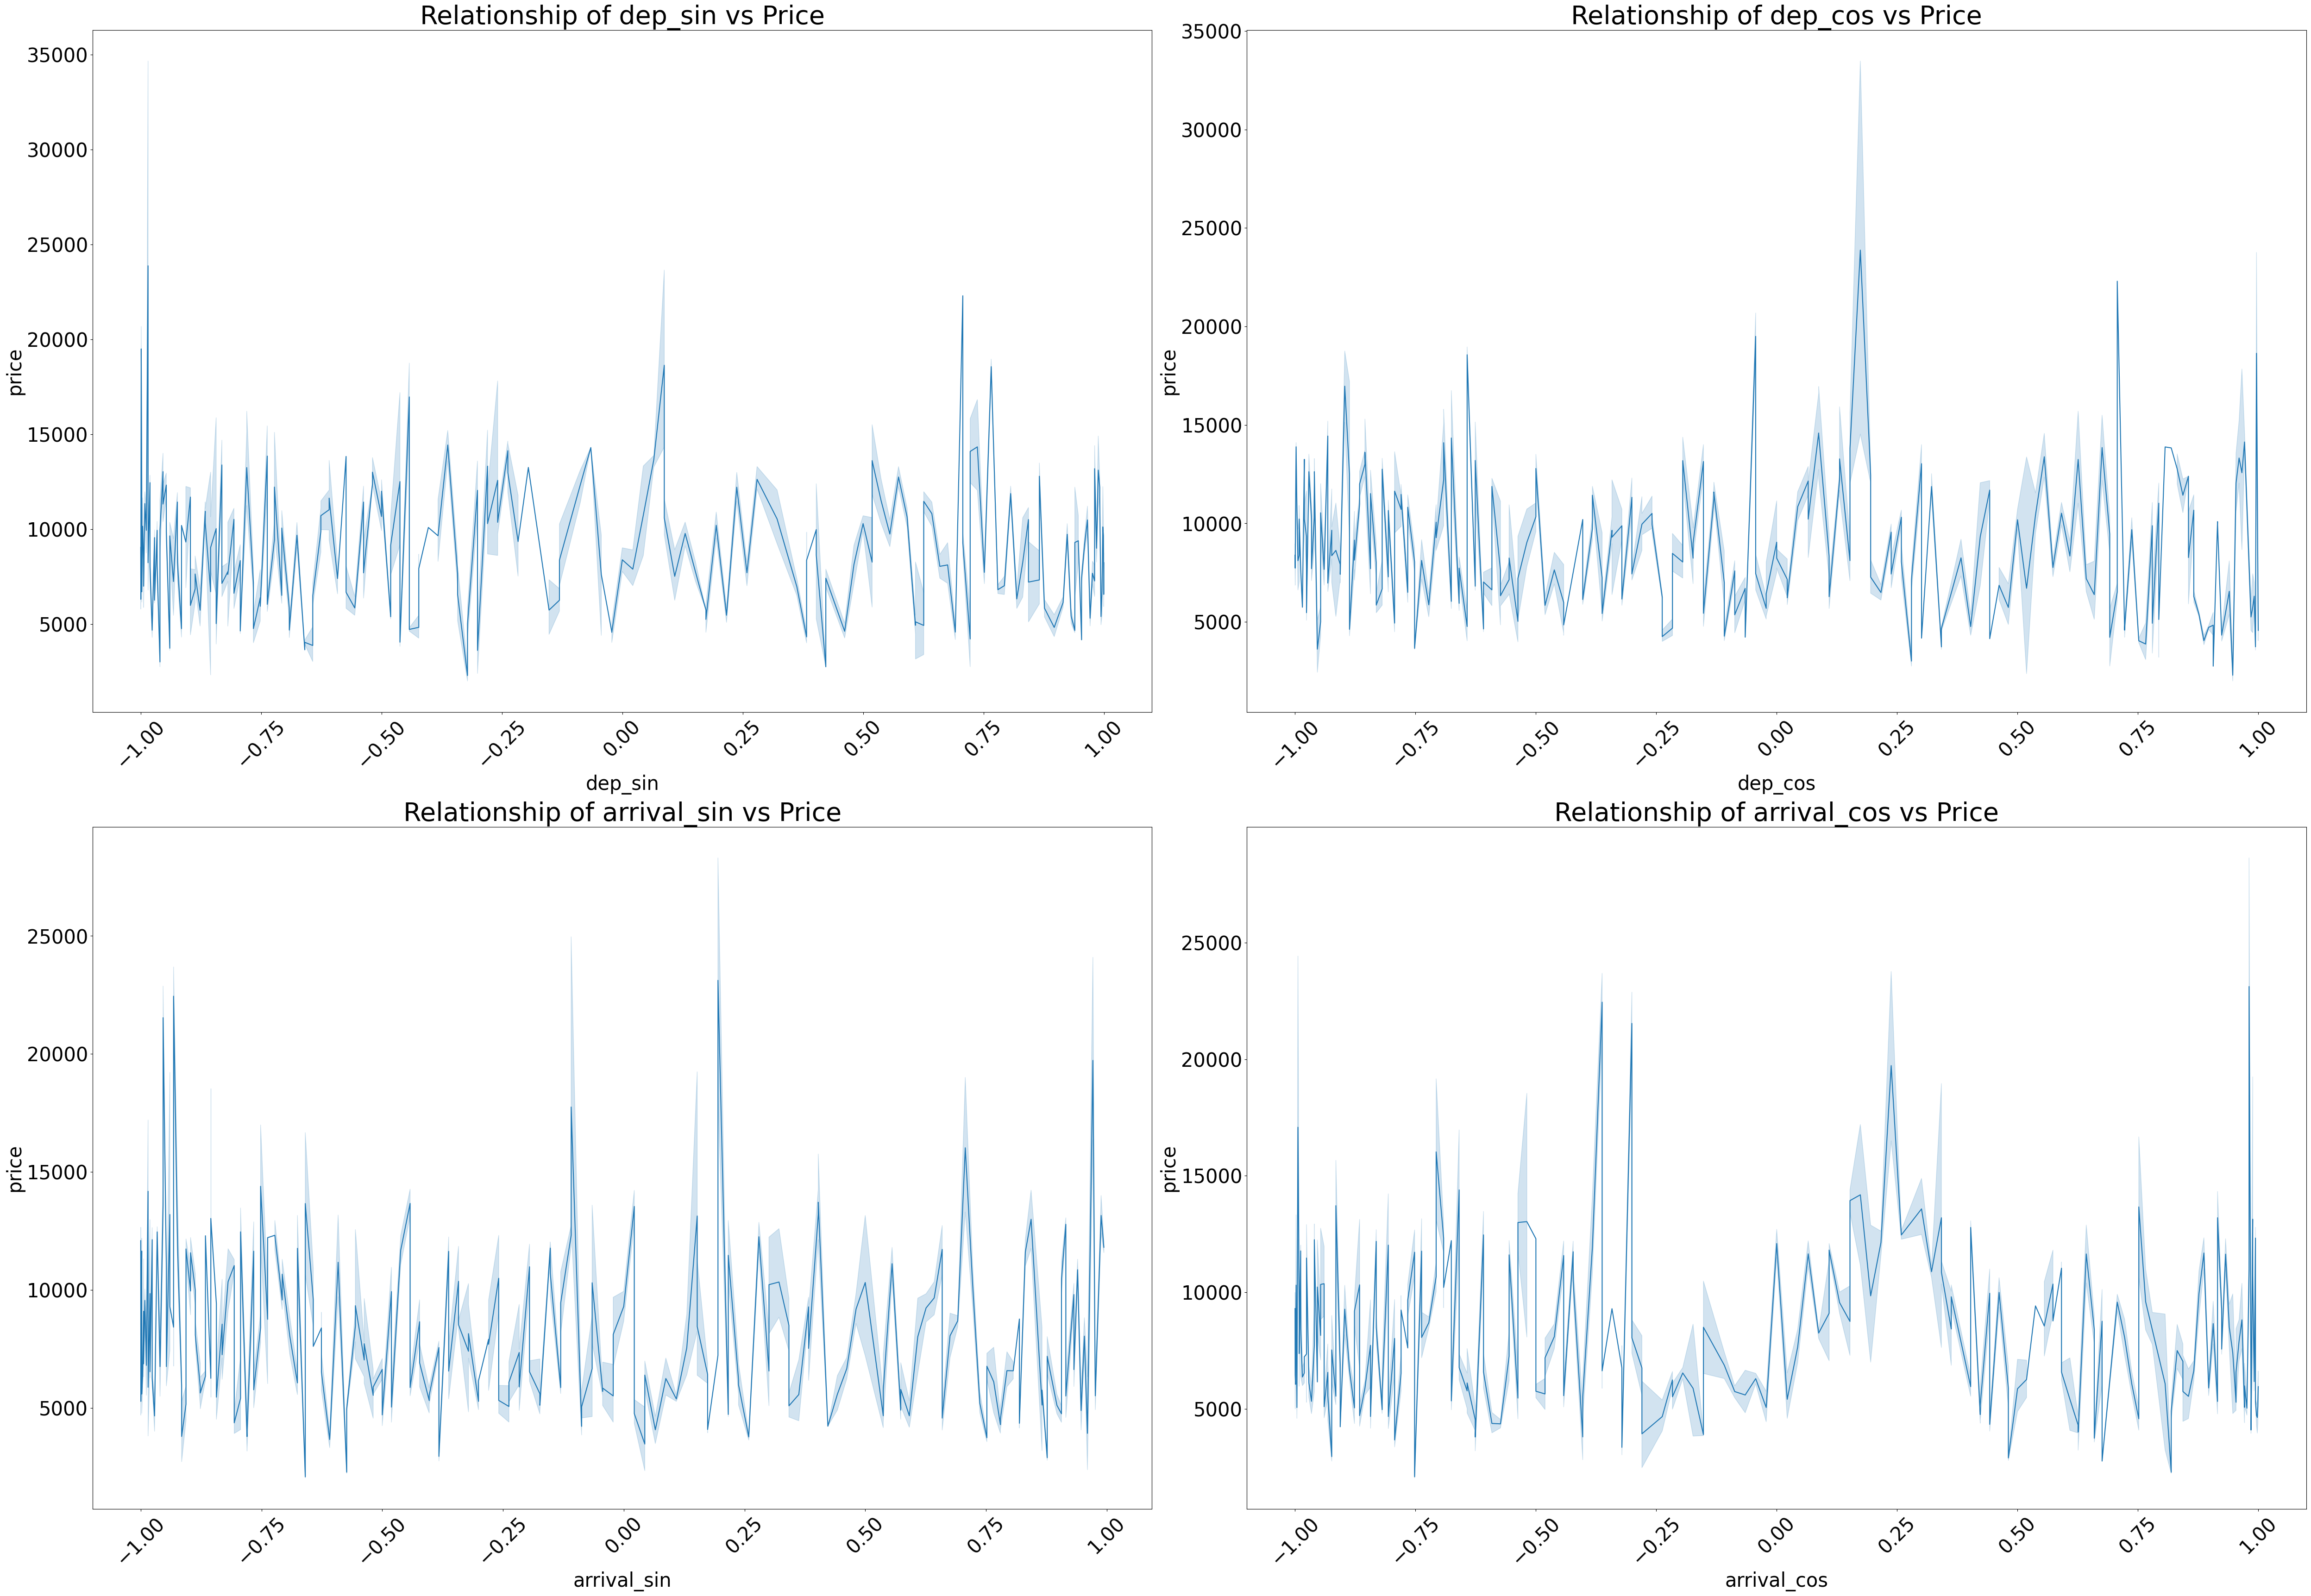

In [ ]:
#relationship with year,month,weekday,weekend
cyclic_patterns = data[['dep_sin','dep_cos','arrival_sin','arrival_cos']]
plt.figure(figsize=(50,50))
for i,col in enumerate(cyclic_patterns):
  plt.subplot(3,2,i+1)
  sns.lineplot(x=col,y='price',data=data)
  plt.title(f'Relationship of {col} vs Price',fontsize=('40'))
  plt.xlabel(col,fontsize=30)
  plt.ylabel('price',fontsize=30)
  plt.xticks(rotation=45,fontsize=30)
  plt.yticks(fontsize=30)
plt.tight_layout()
plt.show()

Insights:

1. The lines in all four graphs are relatively flat.this suggests that, the time of day of departure or arrival doesn't have a strong, predictable impact on the flight price.There are some minor fluctuations, but there isn't a clear pattern like "flights at midnight are always cheaper."

### **4. covert dep_time and arrival_time into bins like morning and afternoon,evening,night..........for Eda purpose**

In [ ]:
#converting dep_time to bins
data['dep_hour'] = pd.to_datetime(data['dep_time'],format='%H:%M').dt.hour

#applying bins using pd.cut
bins = [0,6,12,18,24]
labels = ['night','morning','afternoon','evening']

#dep_bins
data['dep_bin'] = pd.cut(data['dep_hour'],bins = bins,labels=labels)


In [ ]:
data.dep_bin.head(5)

0      evening
1        night
2      morning
3    afternoon
4    afternoon
Name: dep_bin, dtype: category
Categories (4, object): ['night' < 'morning' < 'afternoon' < 'evening']

In [ ]:
#converting arrival_time to bins
data['arrival_hour'] = pd.to_datetime(data['arrival_time'].str.extract(r'(\d{2}:\d{2})')[0], format='%H:%M').dt.hour

#applying bins using pd.cut
bins = [0,6,12,18,24]
labels = ['night','morning','afternoon','evening']

#dep_bins
data['arrival_bin'] = pd.cut(data['arrival_hour'],bins = bins,labels=labels)


In [ ]:
data.arrival_bin.head()

0        night
1    afternoon
2        night
3      evening
4      evening
Name: arrival_bin, dtype: category
Categories (4, object): ['night' < 'morning' < 'afternoon' < 'evening']

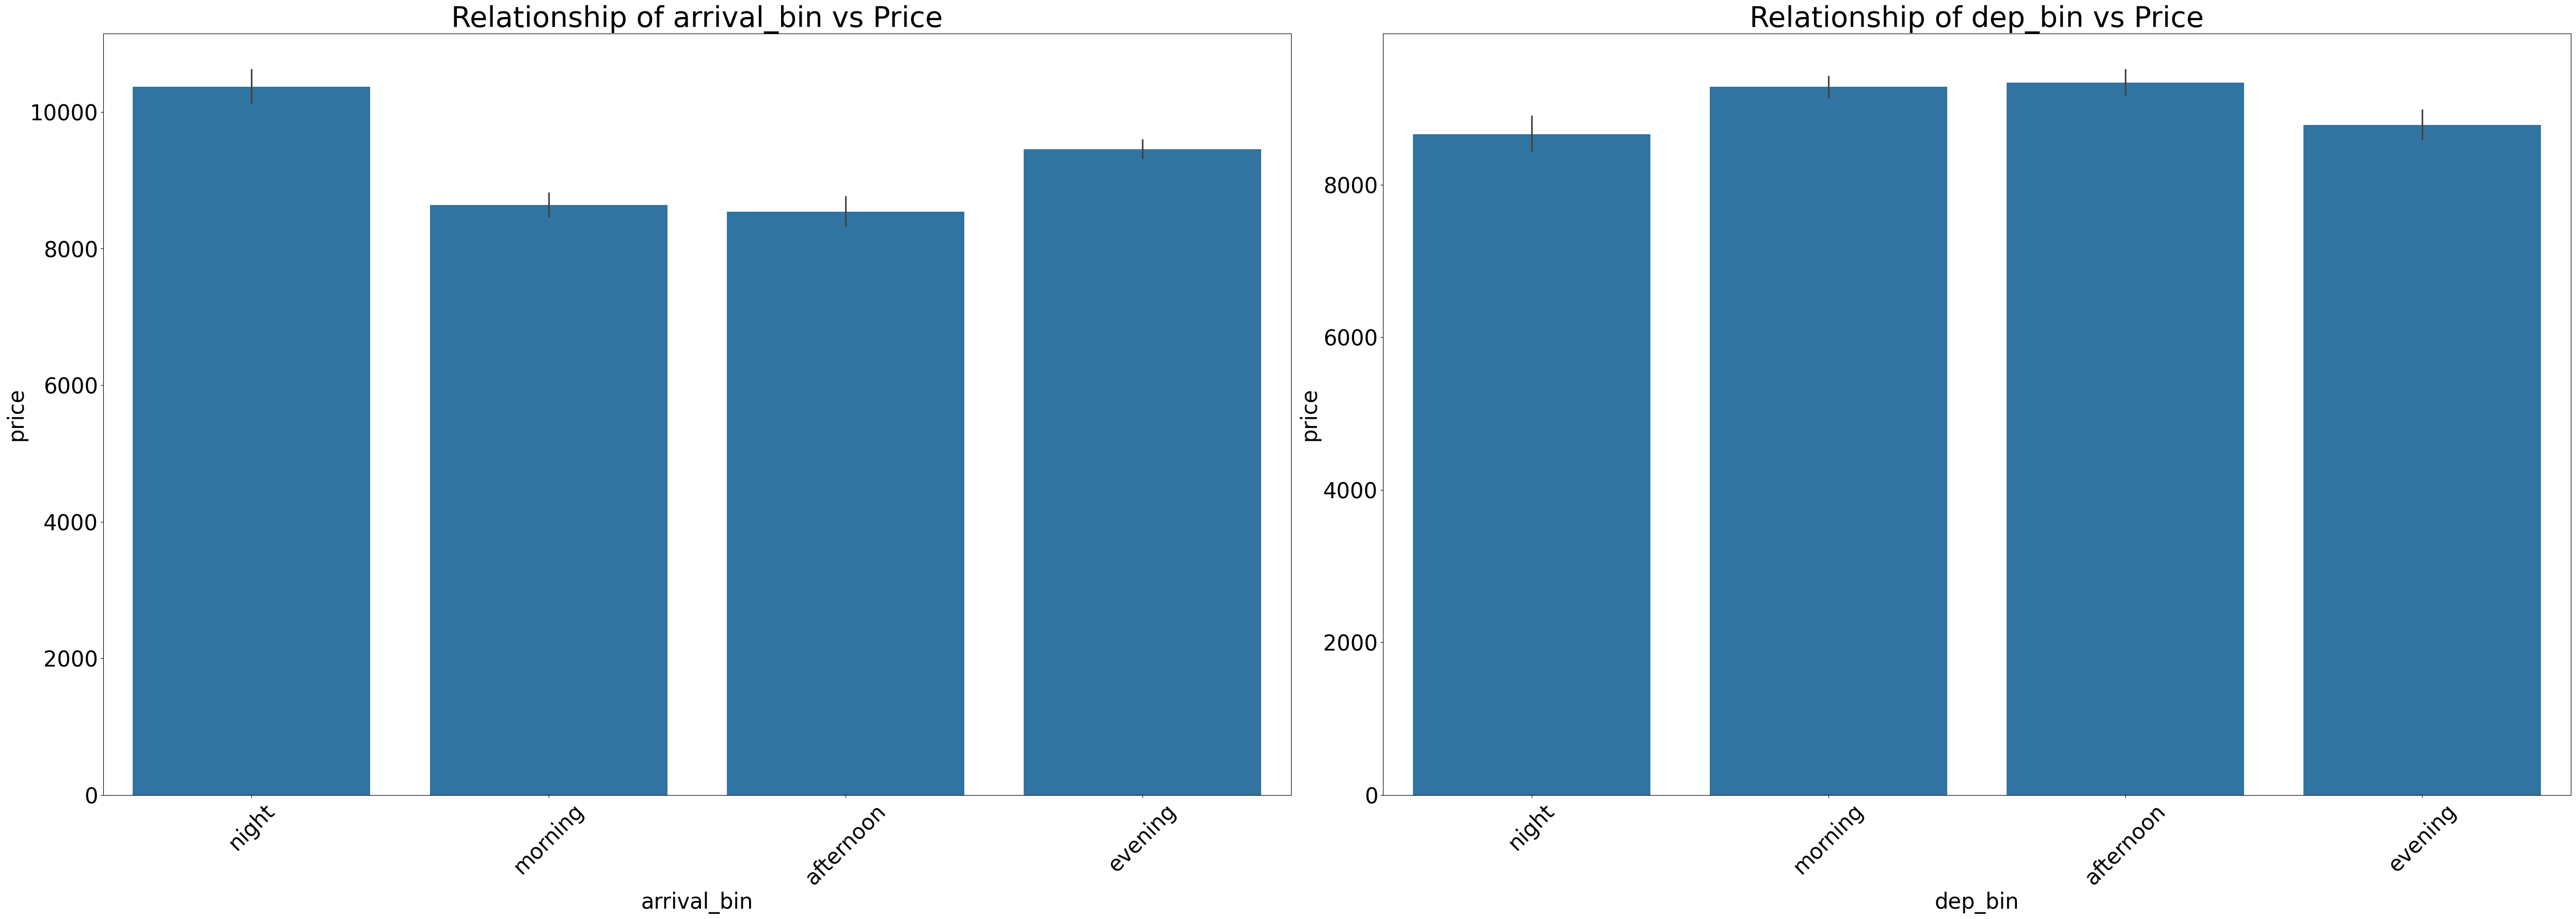

In [ ]:
#relationship with price and time of arrival and departure of flight

cyclic_pattern_bins= data[['arrival_bin','dep_bin']]
plt.figure(figsize=(50,50))
for i,col in enumerate(cyclic_pattern_bins):
  plt.subplot(3,2,i+1)
  sns.barplot(x=col,y='price',data=data)
  plt.title(f'Relationship of {col} vs Price',fontsize=('40'))
  plt.xlabel(col,fontsize=30)
  plt.ylabel('price',fontsize=30)
  plt.xticks(rotation=45,fontsize=30)
  plt.yticks(fontsize=30)
plt.tight_layout()
plt.show()

**Insights:**

**Departure Time**:

1. Morning departures are the most expensive.

2. Night departures are the cheapest.

3. Afternoon and evening departures have similar, mid-range prices.

**Arrival Time**:

1. Night arrivals are slightly more expensive than other times.

2. Morning, afternoon, and evening arrival times have similar average prices.

In conclusion, departure time has a greater influence on price than arrival time, with morning flights being the most costly and night flights the least.



### **5.converting total stops to 1,2,3,4,5**

In [ ]:
data.total_stops.value_counts()

total_stops
1 stop      5625
non-stop    3491
2 stops     1519
3 stops       45
4 stops        1
Name: count, dtype: int64

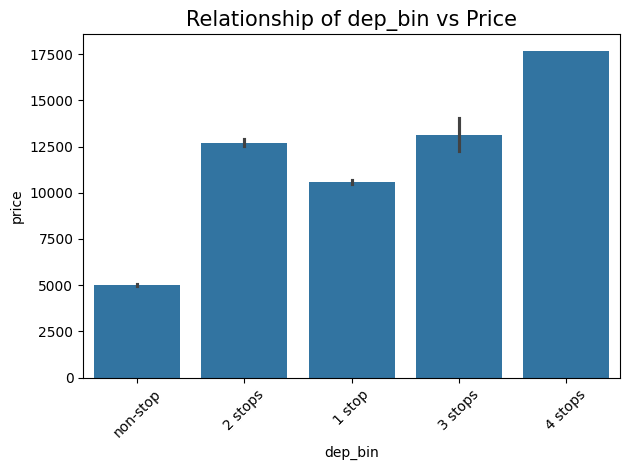

In [ ]:
#total_stops vs price
sns.barplot(x='total_stops',y='price',data=data)
plt.title(f'Relationship of {col} vs Price',fontsize=('15'))
plt.xlabel(col,fontsize=10)
plt.ylabel('price',fontsize=10)
plt.xticks(rotation=45,fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

Insights:
1. More Stops, Higher Price: As the number of stops increases, the average flight price also increases.

2. Non-Stop Flights are the Cheapest: Non-stop flights have the lowest average price.

3. Outlier: The slightly lower price for "4 stops" is likely due to a very small sample size and not a general trend.

In summary, the number of stops is a very important factor in determining the flight price, with non-stop flights being the most economical.

In [ ]:
#here i found delhi and new delhi logically both same so remapping with new delhi to delhi
data.destination = data.destination.map({'Banglore':'Banglore','Cochin':'Cochin','Delhi':'Delhi','New Delhi':'Delhi','Hyderabad':'Hyderabad','Kolkata':'Kolkata'})

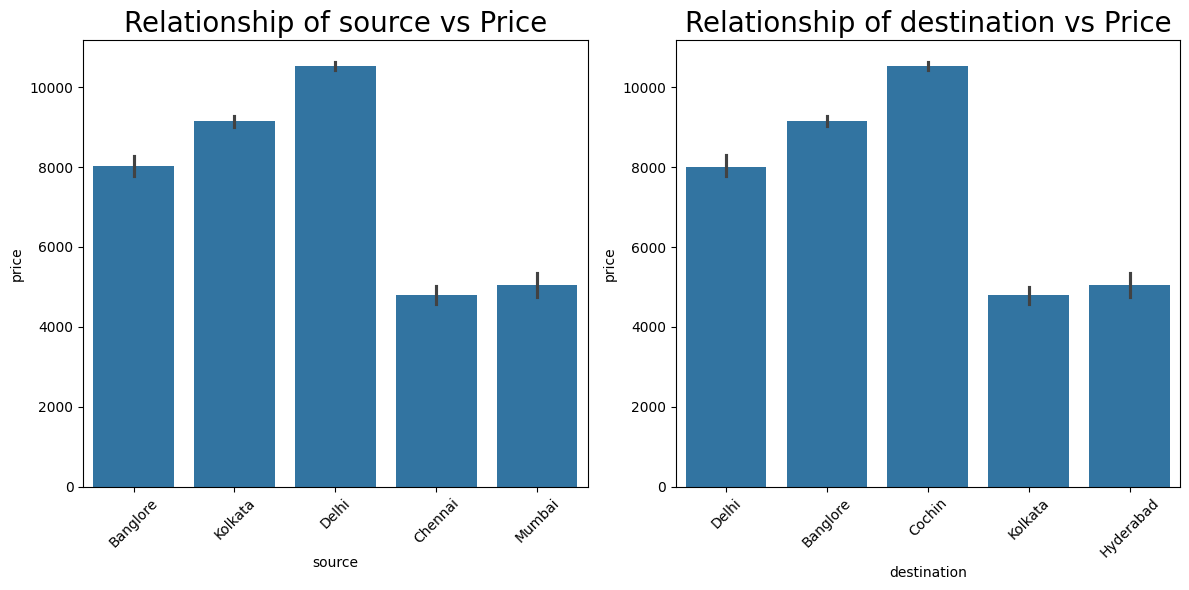

In [ ]:
categorical_columns = data[['source','destination']]
plt.figure(figsize=(12,6))
for i,col in enumerate(categorical_columns):
  plt.subplot(1,2,i+1)
  sns.barplot(x=col,y='price',data=data)
  plt.title(f'Relationship of {col} vs Price',fontsize=('20'))
  plt.xlabel(col,fontsize=10)
  plt.ylabel('price',fontsize=10)
  plt.xticks(rotation=45,fontsize=10)
  plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


**Insights:**

**Source vs. Price**:

1. Flights from Delhi are Most Expensive.
2. Flights from Chennai are Least Expensive.
3. Other Cities are in the Middle (Kolkata, Banglore, and Mumbai).

**Destination vs. Price**:

1. Flights to Cochin are Most Expensive.
2. Flights to Kolkata are Least Expensive.
3. Other Destinations are Similar (Banglore, Delhi, and Hyderabad).

**In summary**:

The source and destination cities have a noticeable impact on the flight price. Delhi as a source and Cochin as a destination seem to be the most expensive routes, while Chennai as a source and Kolkata as a destination are the most budget-friendly.

In [ ]:
data.columns

Index(['airline', 'date_of_journey', 'source', 'destination', 'route',
       'dep_time', 'arrival_time', 'duration', 'total_stops',
       'additional_info', 'price', 'year', 'month', 'day', 'weekend',
       'duration_to_minutes', 'dep_mins', 'dep_sin', 'dep_cos', 'arrival_hour',
       'arrival_minute', 'arrival_total_minutes', 'arrival_sin', 'arrival_cos',
       'dep_hour', 'dep_bin', 'arrival_bin'],
      dtype='object')

In [ ]:
#Average Price by Airline
airlines = data.groupby(['airline'])['price'].mean().sort_values()

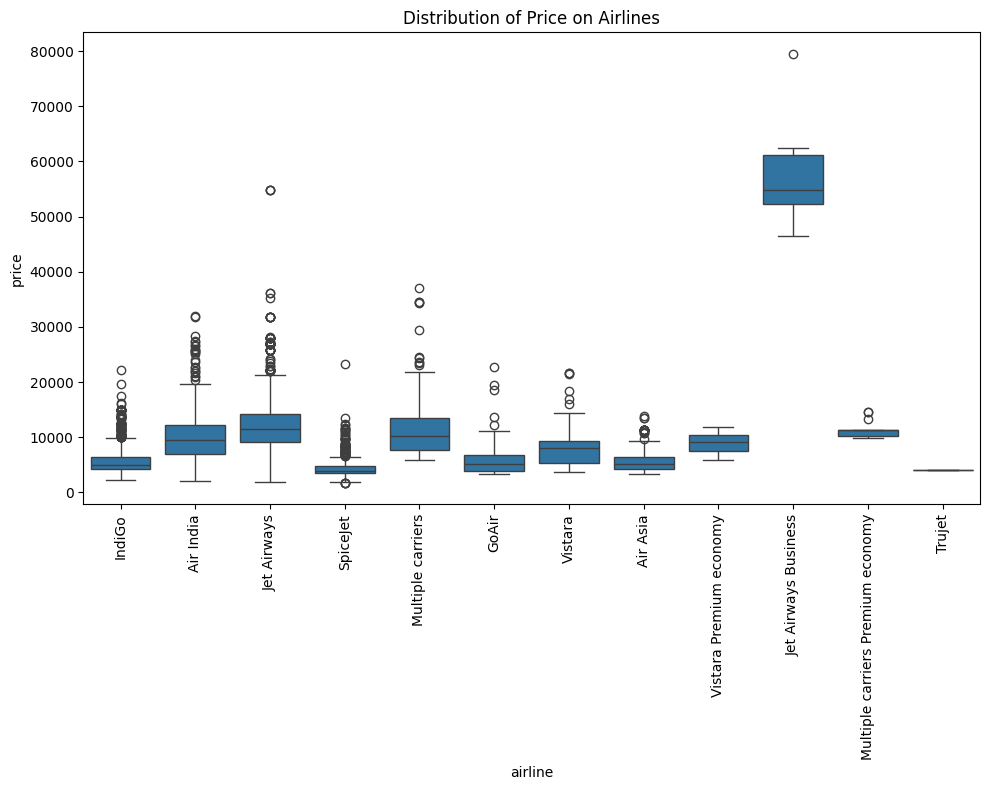

In [ ]:
plt.figure(figsize=(10,8))
sns.boxplot(x='airline',y='price',data=data)

plt.title('Distribution of Price on Airlines')
plt.xticks(rotation=90)
plt.tight_layout()

Insights:

1. Jet Airways Business is the most expensive.

2. Among economy options, Jet Airways is the priciest.

3. Trujet, SpiceJet, and Air Asia are the most budget-friendly airlines.

4. Most airlines have some very expensive flights, as shown by the outliers.

In [ ]:
# Source–Destination pair analysis
source_dest_prices = data.groupby(['source', 'destination'])['price'].mean().sort_values(ascending=False).reset_index()
source_dest_prices

source destination         price
0     Delhi      Cochin  10539.439057
1   Kolkata    Banglore   9158.389411
2  Banglore       Delhi   8017.464269
3    Mumbai   Hyderabad   5042.083333
4   Chennai     Kolkata   4789.892388

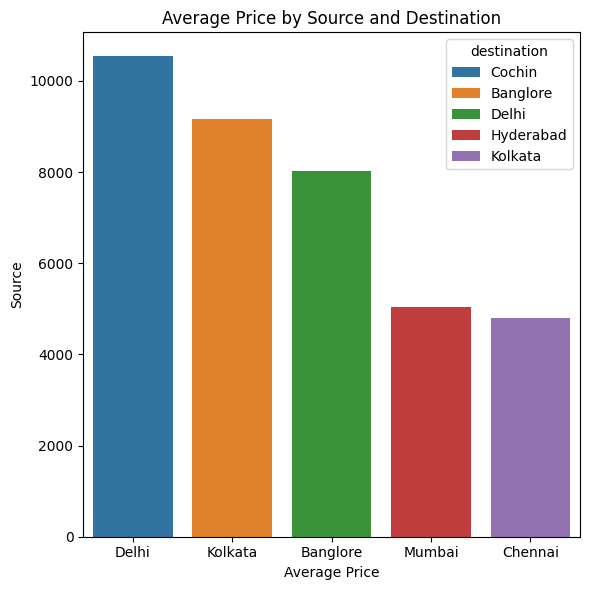

In [ ]:
source_dest_prices = data.groupby(['source', 'destination'])['price'].mean().sort_values(ascending=False).reset_index()

# Create the bar plot
plt.figure(figsize=(6, 6))
sns.barplot(x='source', y='price', hue='destination', data=source_dest_prices)
plt.title('Average Price by Source and Destination')
plt.xlabel('Average Price')
plt.ylabel('Source')
plt.tight_layout()
plt.show()

Insights:
1. Most Expensive Route: Delhi to Cochin
2. Cheapest Route: Chennai to Kolkata
3. Other Budget-Friendly Route: Mumbai to Hyderabad
4. Mid-Range Routes: Banglore to Delhi and Kolkata to Banglore

In [ ]:
#Count of flights per route
data.groupby(['airline'])['route'].size().sort_values()

airline
Trujet                                  1
Vistara Premium economy                 3
Jet Airways Business                    6
Multiple carriers Premium economy      13
GoAir                                 194
Air Asia                              319
Vistara                               479
SpiceJet                              818
Multiple carriers                    1196
Air India                            1751
IndiGo                               2053
Jet Airways                          3849
Name: route, dtype: int64

Insights:

1. Top Airlines: Jet Airways, IndiGo, and Air India operate the most flights.

2. Market Share: Full-service carriers dominate this dataset.

3. Niche Airlines: Trujet, Vistara Premium, and Jet Airways Business have very few flights, suggesting they serve specific routes or customer segments.

<Axes: xlabel='price', ylabel='Count'>

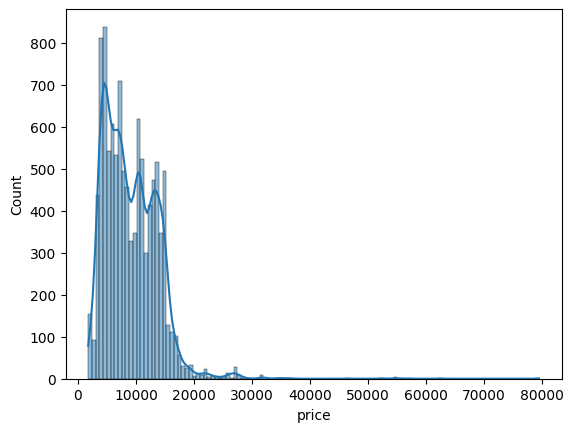

In [ ]:
#distribution of target column price
sns.histplot(x='price',data=data,kde=True)

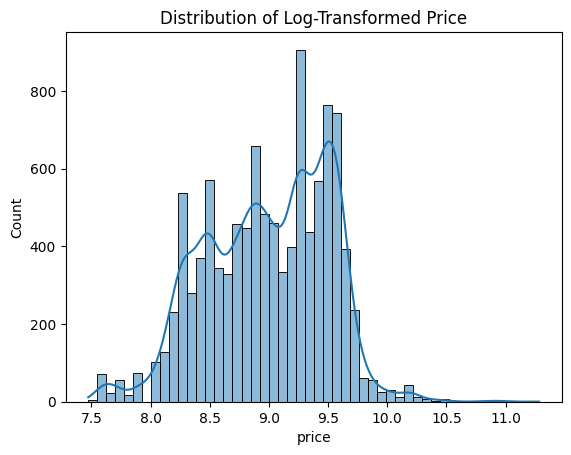

In [ ]:
data['price'] = np.log1p(data['price'])

# You can then check the distribution again to see the effect of the transformation
sns.histplot(x='price', data=data, kde=True)
plt.title('Distribution of Log-Transformed Price')
plt.show()

Insights:
1. price is not evenly distributed

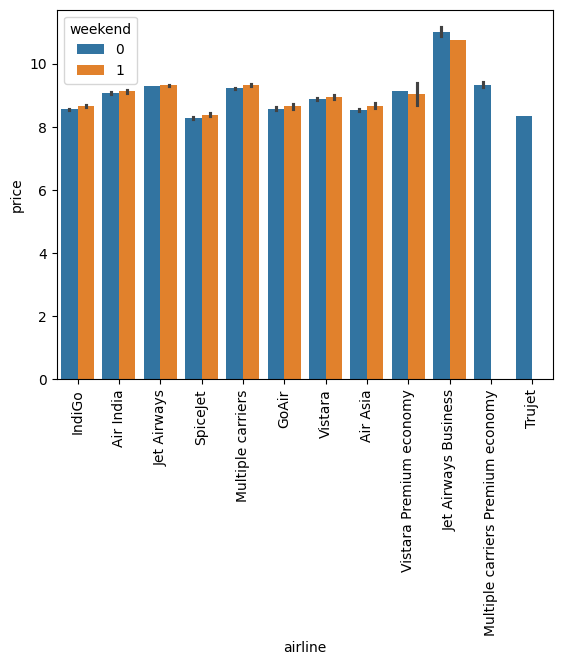

In [ ]:
#airline vs day of week
sns.barplot(x='airline',y='price',hue='weekend',data=data)
plt.xticks(rotation=90)
plt.show()

Insights:

1.Jet Airways is pricier on weekends.

2.Most other airlines have consistent pricing throughout the week.

3.Budget airlines show the least price variation between weekdays and weekends.

# **Data Preprocessing**

### **1.handling null values**

In [ ]:
#check for null values

data.isnull().sum()

airline                    0
date_of_journey            0
source                     0
destination                0
route                      1
dep_time                   0
arrival_time               0
duration                   0
total_stops                1
additional_info            0
price                      0
year                       0
month                      0
day                        0
weekend                    0
duration_to_minutes        0
dep_mins                   0
dep_sin                    0
dep_cos                    0
arrival_hour               0
arrival_minute             0
arrival_total_minutes      0
arrival_sin                0
arrival_cos                0
dep_hour                   0
dep_bin                   40
arrival_bin              322
dtype: int64

In [ ]:
data = data.dropna()

In [ ]:
data.isnull().sum()

airline                  0
date_of_journey          0
source                   0
destination              0
route                    0
dep_time                 0
arrival_time             0
duration                 0
total_stops              0
additional_info          0
price                    0
year                     0
month                    0
day                      0
weekend                  0
duration_to_minutes      0
dep_mins                 0
dep_sin                  0
dep_cos                  0
arrival_hour             0
arrival_minute           0
arrival_total_minutes    0
arrival_sin              0
arrival_cos              0
dep_hour                 0
dep_bin                  0
arrival_bin              0
dtype: int64

### **2.handling outliers**

In [ ]:
data.dtypes

airline                          object
date_of_journey          datetime64[ns]
source                           object
destination                      object
route                            object
dep_time                         object
arrival_time                     object
duration                         object
total_stops                      object
additional_info                  object
price                           float64
year                              int32
month                             int32
day                               int32
weekend                           int64
duration_to_minutes               int64
dep_mins                          int32
dep_sin                         float64
dep_cos                         float64
arrival_hour                      int32
arrival_minute                    int32
arrival_total_minutes             int32
arrival_sin                     float64
arrival_cos                     float64
dep_hour                          int32
dep_bin                        category
arrival_bin                    category
dtype: object

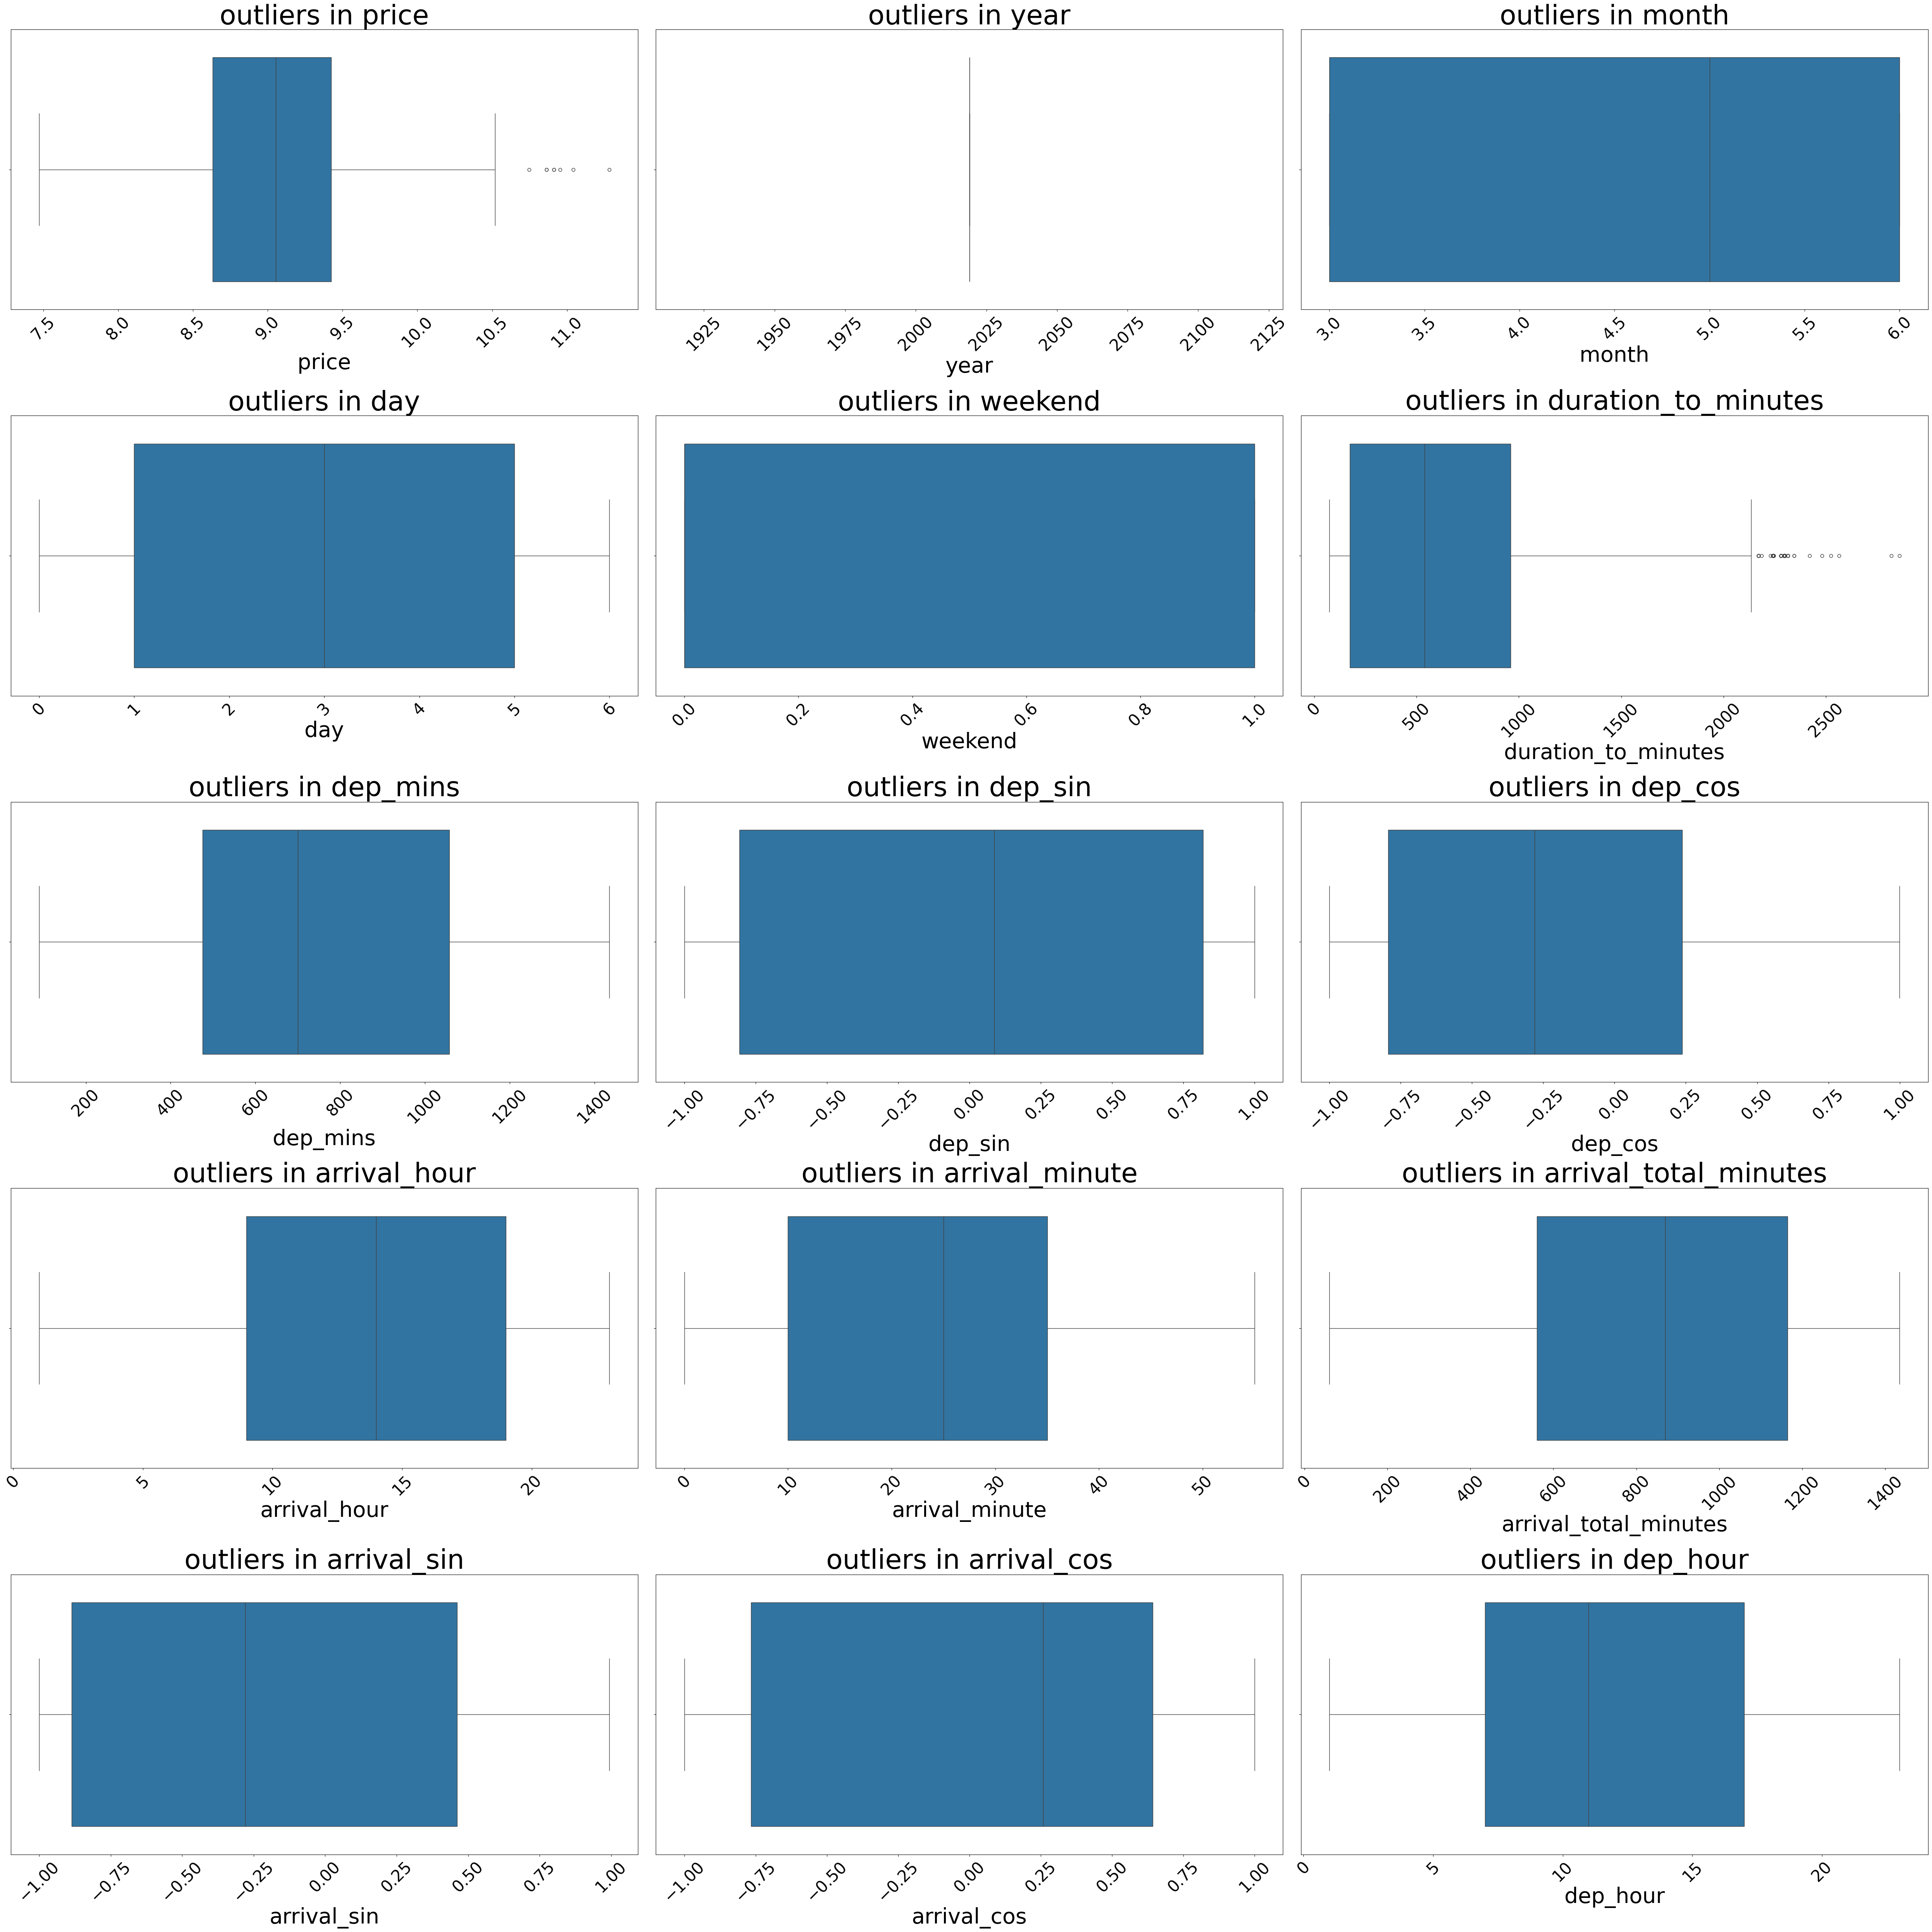

In [ ]:
numerical_columns = data.select_dtypes(include = ['int','float'])
plt.figure(figsize=(50,50))
for i,col in enumerate(numerical_columns):
  plt.subplot(5,3,i+1)
  sns.boxplot(x=col,data=data)
  plt.title(f'outliers in {col}',fontsize=('50'))
  plt.xlabel(col,fontsize=40)
  plt.xticks(rotation=45,fontsize=30)
  plt.yticks(fontsize=30)
plt.tight_layout()
plt.show()

In [ ]:
#handling outliers in duration_into_minutes
q1 = data.duration_to_minutes.quantile(0.25)
q3 = data.duration_to_minutes.quantile(0.75)
IQR = q3-q1
lower_limit = q1 - q1*IQR
upper_limit = q3 + q3*IQR
outliers = data[(data.duration_to_minutes < lower_limit)|data.duration_to_minutes > upper_limit]
data_no_outliers = data[(data.duration_to_minutes >= lower_limit)|data.duration_to_minutes <= upper_limit]
mean_duration = data_no_outliers['duration_to_minutes'].mean()
data.loc[data['duration_to_minutes'] < lower_limit, 'duration_to_minutes'] = mean_duration
data.loc[data['duration_to_minutes'] > upper_limit, 'duration_to_minutes'] = mean_duration



print(data.shape)

(10319, 27)


### **3.categorical encoding of airline column,source,destination,total_stops,dep_bin,arrival_bin**

In [ ]:
#airline mapping done according  to the price
data.airline = data.airline.map({'Jet Airways':11,'IndiGo':4,'Air India':8,'Multiple carriers':9,'SpiceJet':2,'Vistara':6,'Air Asia':3,'GoAir':5,
                                'Multiple carriers Premium economy':10,'Jet Airways Business':12,'Vistara Premium economy':7,'Trujet':1})

In [ ]:
# creating new_interaction term from source and destination
data['route_interaction'] = data['source'] + '_' + data['destination']
data.head(2)

airline date_of_journey    source destination                  route  \
0        4      2019-03-24  Banglore       Delhi              BLR → DEL   
1        8      2019-05-01   Kolkata    Banglore  CCU → IXR → BBI → BLR   

  dep_time  arrival_time duration total_stops additional_info     price  year  \
0    22:20  01:10 22 Mar     2 50    non-stop         No info  8.268219  2019   
1    05:50         13:15     7 25     2 stops         No info  8.944159  2019   

   month  day  weekend  duration_to_minutes  dep_mins   dep_sin   dep_cos  \
0      3    6        1                170.0      1340 -0.422618  0.906308   
1      5    2        0                445.0       350  0.999048  0.043619   

   arrival_hour  arrival_minute  arrival_total_minutes  arrival_sin  \
0             1              10                     70     0.300706   
1            13              15                    795    -0.321439   

   arrival_cos  dep_hour  dep_bin arrival_bin route_interaction  
0     0.953717        22  evening       night    Banglore_Delhi  
1    -0.946930         5    night   afternoon  Kolkata_Banglore

In [ ]:
data.route_interaction.value_counts()

route_interaction
Delhi_Cochin        4515
Kolkata_Banglore    2735
Banglore_Delhi      2059
Mumbai_Hyderabad     656
Chennai_Kolkata      354
Name: count, dtype: int64

In [ ]:
data.route_interaction.unique()

array(['Banglore_Delhi', 'Kolkata_Banglore', 'Delhi_Cochin',
       'Chennai_Kolkata', 'Mumbai_Hyderabad'], dtype=object)

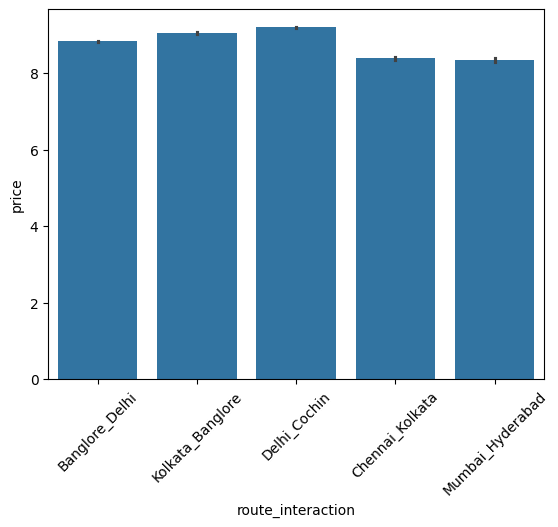

In [ ]:
#check relation with price and route_interaction
sns.barplot(x='route_interaction',y='price',data=data)
plt.xticks(rotation=45)
plt.show()

In [ ]:
#categorical encoding of route_interacion
data.route_interaction = data.route_interaction.map({'Banglore_Delhi':3, 'Kolkata_Banglore':2, 'Delhi_Cochin':1,
       'Chennai_Kolkata':4, 'Mumbai_Hyderabad':5})

In [ ]:
#source
#doing map according to price at source
data.source = data.source.map({'Banglore':3,'Chennai':5,'Delhi':1,'Kolkata':2,'Mumbai':4})

In [ ]:
#destination
#here i found delhi and new delhi logically bothe same so i m giving same rank to both
#doing map according to alphabetical order
data.destination = data.destination.map({'Banglore':2,'Cochin':1,'Delhi':3,'Hyderabad':5,'Kolkata':4})

In [ ]:
#mapping rank as with length of journeys will increase no. 0f stops accordingly price also increases

data['total_stops'] = data['total_stops'].map({'non-stop':1,'1 stop':2,'2 stops':3,'3 stops':4,'4 stops':5})

In [ ]:
#departure bin
data['dep_bin'] = data['dep_bin'].map({'night':4,'morning':2,'afternoon':1,'evening':3})

In [ ]:
#arrival_bin
data['arrival_bin'] = data['arrival_bin'].map({'night':1,'morning':4,'afternoon':3,'evening':2})

### **2. unwanted cols to drop**

In [ ]:
data.columns

Index(['airline', 'date_of_journey', 'source', 'destination', 'route',
       'dep_time', 'arrival_time', 'duration', 'total_stops',
       'additional_info', 'price', 'year', 'month', 'day', 'weekend',
       'duration_to_minutes', 'dep_mins', 'dep_sin', 'dep_cos', 'arrival_hour',
       'arrival_minute', 'arrival_total_minutes', 'arrival_sin', 'arrival_cos',
       'dep_hour', 'dep_bin', 'arrival_bin', 'route_interaction'],
      dtype='object')

In [ ]:
data.duration.head(5)

0    2 50
1    7 25
2      19
3    5 25
4    4 45
Name: duration, dtype: object

In [ ]:
#droped unrequired columns
data.drop(['date_of_journey','route','dep_time','arrival_time','duration','additional_info','dep_mins','arrival_minute','arrival_total_minutes'],axis=1,inplace=True)

In [ ]:
data.columns

Index(['airline', 'source', 'destination', 'total_stops', 'price', 'year',
       'month', 'day', 'weekend', 'duration_to_minutes', 'dep_sin', 'dep_cos',
       'arrival_hour', 'arrival_sin', 'arrival_cos', 'dep_hour', 'dep_bin',
       'arrival_bin', 'route_interaction'],
      dtype='object')

###  **3. check for null values**

In [ ]:
data.isnull().sum()

airline                0
source                 0
destination            0
total_stops            0
price                  0
year                   0
month                  0
day                    0
weekend                0
duration_to_minutes    0
dep_sin                0
dep_cos                0
arrival_hour           0
arrival_sin            0
arrival_cos            0
dep_hour               0
dep_bin                0
arrival_bin            0
route_interaction      0
dtype: int64

In [ ]:
data.dropna(inplace=True)
data.isnull().sum()

airline                0
source                 0
destination            0
total_stops            0
price                  0
year                   0
month                  0
day                    0
weekend                0
duration_to_minutes    0
dep_sin                0
dep_cos                0
arrival_hour           0
arrival_sin            0
arrival_cos            0
dep_hour               0
dep_bin                0
arrival_bin            0
route_interaction      0
dtype: int64

### **4. check for duplicates**

In [ ]:
data.duplicated().sum()

np.int64(960)

In [ ]:
data.drop_duplicates(inplace=True)
data.duplicated().sum()

np.int64(0)

In [ ]:
data.shape

(9359, 19)

# **Feature Engineering**

##### **1.check for correlation using heat map**

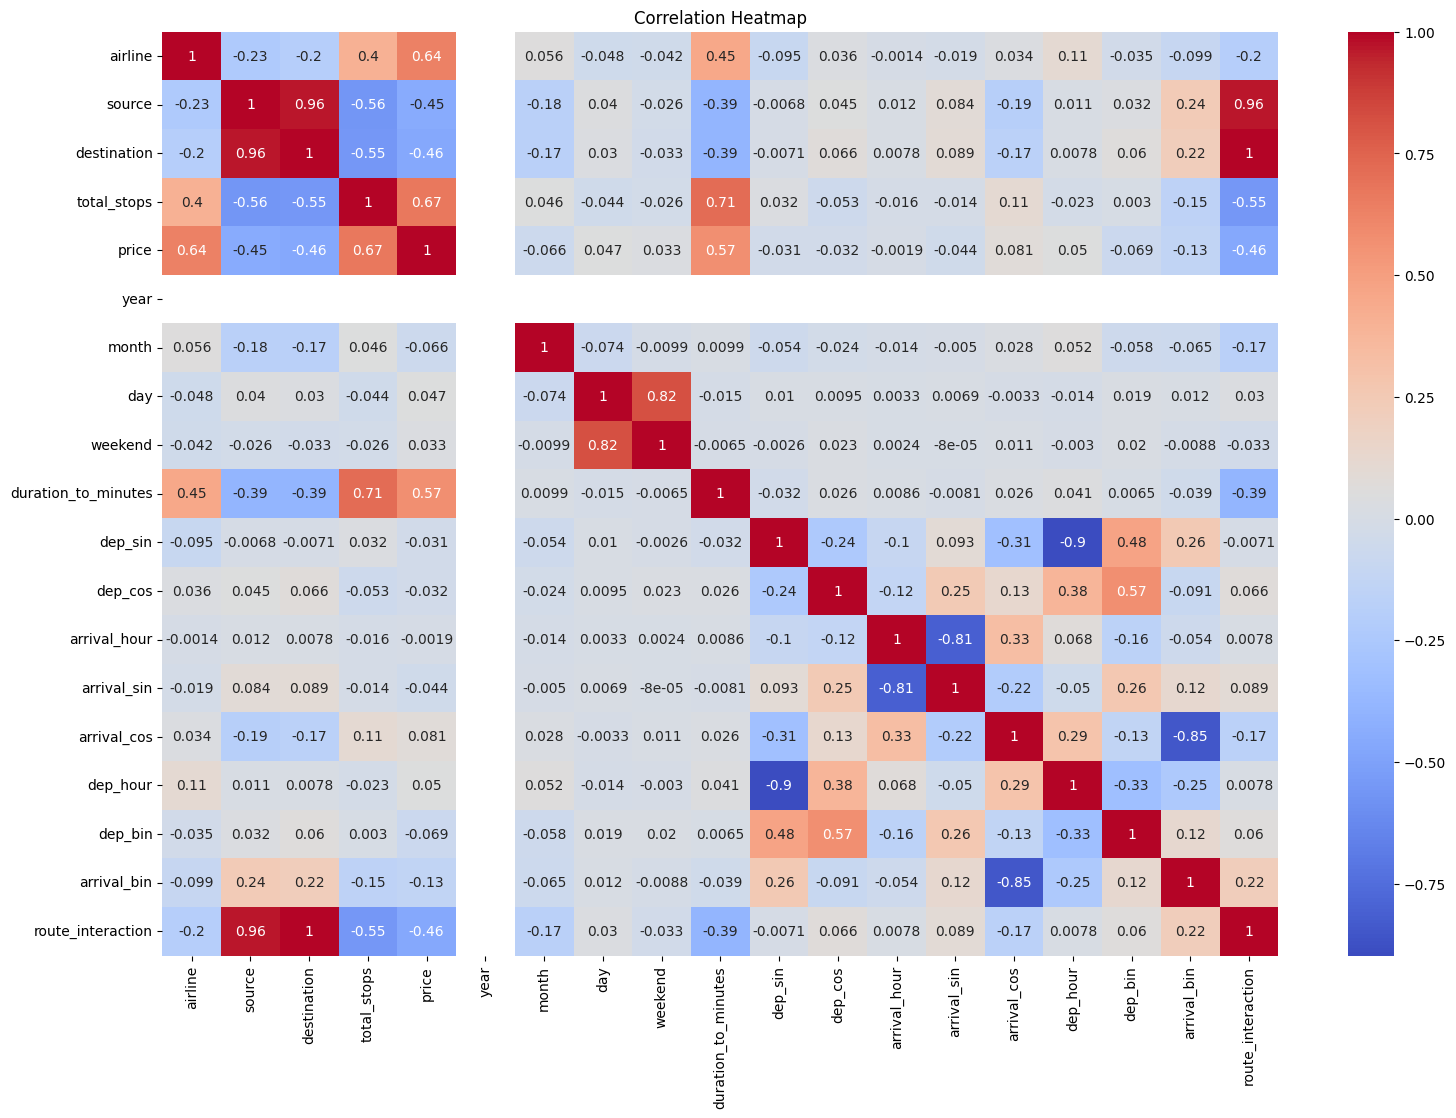

In [ ]:
plt.figure(figsize=(18, 12))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

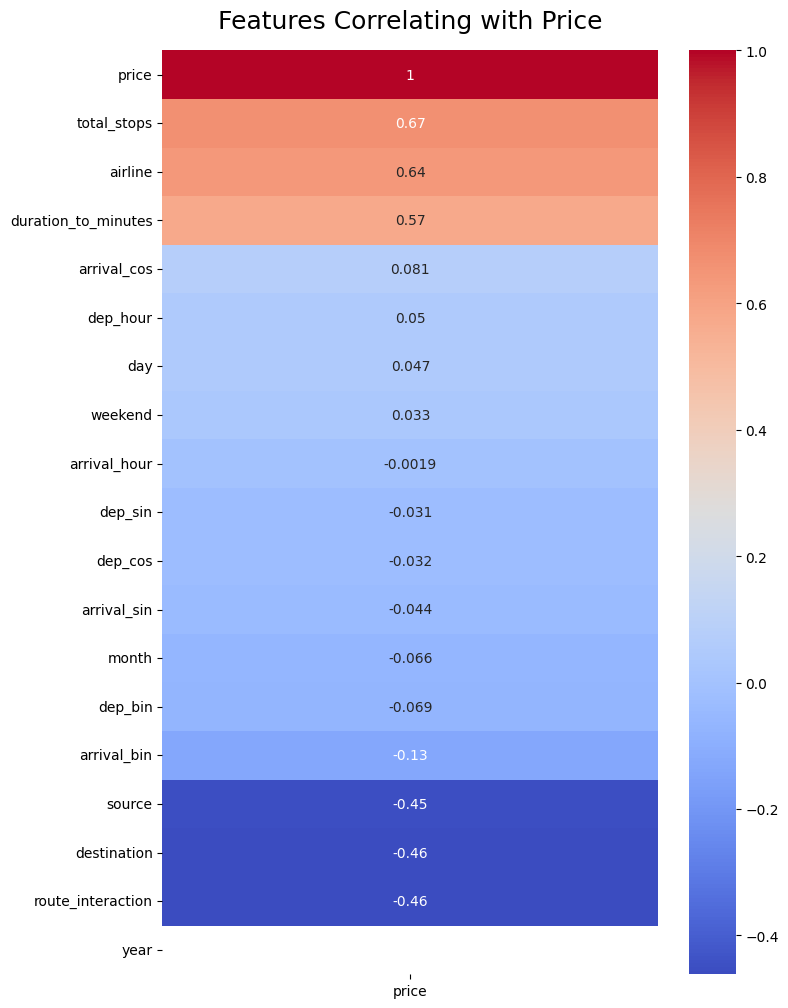

In [ ]:
#heatmap of price vs input variables
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(data.corr()[['price']].sort_values(by='price', ascending=False), annot=True, cmap='coolwarm')
heatmap.set_title('Features Correlating with Price', fontdict={'fontsize':18}, pad=16);

Insights:
there is multicollinearity between
1. arrival_cos and arrival_bin : -0.85
2. arrival_sin and arrival_hour : -0.81
3. dep_hour and dep_sin : -0.9
4. destination and source : 0.96
5. duration_to_minutes and total_stops : 0.71
6. day and weekend : 0.82

............................



In [ ]:
#there is multicollinearity between input variables
#dropping features with bins
data = data.drop(['arrival_bin','dep_bin','dep_hour','arrival_hour','source','destination','weekend'],axis=1)

In [ ]:
# creating new interacting columns with duration_to_minutes and total_stops
data['duration_per_stop'] = data['duration_to_minutes'] / data['total_stops']
data['duration_times_stops'] = data['duration_to_minutes'] * data['total_stops']

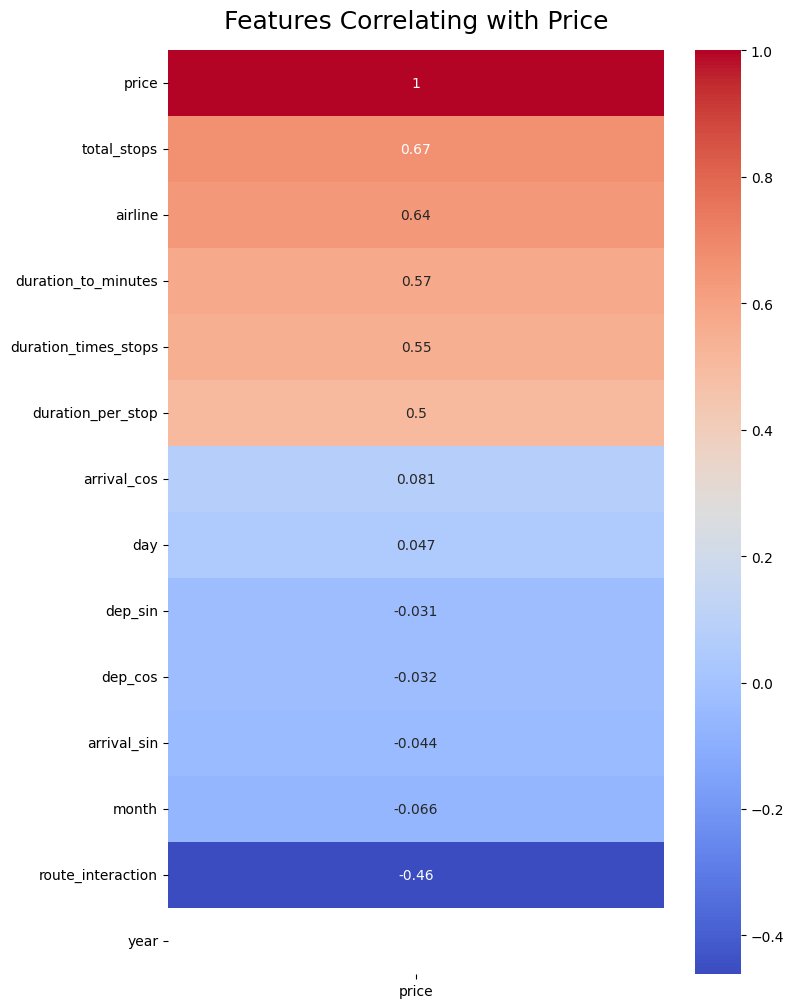

In [ ]:
#rechecking heatmap of price vs input variables
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(data.corr()[['price']].sort_values(by='price', ascending=False), annot=True, cmap='coolwarm')
heatmap.set_title('Features Correlating with Price', fontdict={'fontsize':18}, pad=16);

In [ ]:
#duration_times_stops is more correlated with price so drop duration_per_stops
data.drop(['duration_per_stop'],axis=1,inplace=True)

#### **2. splitting x,y.........train,test,split**

In [ ]:
#split x, y
x = data.drop('price',axis=1)
y = data.price

### **3. feature selection technique**

In [ ]:
'''from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
estimator = RandomForestRegressor()
selector = RFE(estimator , n_features_to_select=9)

x_new = selector.fit_transform(x,y)
selected_features = selector.get_support(indices=True)
selected_feature_names =x.columns[selected_features]
print('selected_feature_names:',selected_feature_names)'''

"from sklearn.feature_selection import RFE\nfrom sklearn.ensemble import RandomForestRegressor\nestimator = RandomForestRegressor()\nselector = RFE(estimator , n_features_to_select=9)\n\nx_new = selector.fit_transform(x,y)\nselected_features = selector.get_support(indices=True)\nselected_feature_names =x.columns[selected_features]\nprint('selected_feature_names:',selected_feature_names)"

In [ ]:
'''new_data = data[['airline', 'total_stops', 'month', 'day', 'duration_to_minutes',
       'dep_sin', 'dep_cos', 'route_interaction',
       'duration_times_stops','price']]
x = new_data.drop('price',axis=1)
y = new_data.price'''

"new_data = data[['airline', 'total_stops', 'month', 'day', 'duration_to_minutes',\n       'dep_sin', 'dep_cos', 'route_interaction',\n       'duration_times_stops','price']]\nx = new_data.drop('price',axis=1)\ny = new_data.price"

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

### **4. scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
x_train = std.fit_transform(x_train)
x_test = std.transform(x_test)



In [ ]:
x_train,x_test

(array([[-1.23010939e+00, -1.32030198e+00,  0.00000000e+00, ...,
          1.19323082e+00,  8.73995893e-01, -9.32360825e-01],
        [ 1.01626864e+00,  2.26420118e-01,  0.00000000e+00, ...,
         -1.43437521e+00, -1.98901341e-03,  3.31501256e-01],
        [ 3.74446345e-01,  2.26420118e-01,  0.00000000e+00, ...,
          3.59969945e-01, -8.77973920e-01, -1.68249367e-01],
        ...,
        [ 5.35351974e-02,  1.77314222e+00,  0.00000000e+00, ...,
         -9.94651918e-01, -1.98901341e-03,  2.47173762e+00],
        [-1.23010939e+00,  2.26420118e-01,  0.00000000e+00, ...,
          1.41341176e+00, -1.98901341e-03, -6.75242752e-01],
        [ 1.01626864e+00, -1.32030198e+00,  0.00000000e+00, ...,
         -1.22756377e+00,  8.73995893e-01, -9.32360825e-01]]),
 array([[ 1.01626864e+00,  2.26420118e-01,  0.00000000e+00, ...,
         -1.25865913e+00, -1.98901341e-03,  6.35190381e-02],
        [-1.55102054e+00,  2.26420118e-01,  0.00000000e+00, ...,
         -1.36840245e+00, -8.77973920e

# **Model Building**

## **model1 =  Linear_Regression**

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
model1 = lr.fit(x_train, y_train)
ypred_train_lr = model1.predict(x_train)
ypred_test_lr = model1.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score
lr_train_r2_score = r2_score(y_train , ypred_train_lr )
lr_test_r2_score = r2_score(y_test , ypred_test_lr)
print(lr_train_r2_score,lr_test_r2_score)

0.6616780234152455 0.6809295632333576


## **model2 = Support_Verctor_Regression**

In [ ]:
from sklearn.svm import SVR
svr = SVR(kernel= 'rbf', gamma= 1, epsilon= 0.1, C= 0.5)
model2 = svr.fit(x_train, y_train)
ypred_train_svr = model2.predict(x_train)
ypred_test_svr = model2.predict(x_test)

In [ ]:
svr_train_r2_score = r2_score(y_train , ypred_train_svr )
svr_test_r2_score = r2_score(y_test , ypred_test_svr)
print(svr_train_r2_score,svr_test_r2_score)

0.8506319488525049 0.7063310148946398


### **hyper_parameter_tuning of svm**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grid
param_grid = {'C': [0.1, 1, 0.5, 0.2,10,100,1000],
              'gamma': [1, 0.1, 0.01, 0.001,'scale'],
              'kernel': ['rbf','poly'],
              'epsilon': [0.1,0.5,0.2,0.3],
              'degree':[2,3],
              'coef0' : [0.0,0.1,1]
              }

# Create a GridSearchCV object
grid = RandomizedSearchCV(SVR(), param_grid, refit=True, verbose=1,cv=5)

# Fit the grid search to the data
grid.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=SVR(),
                   param_distributions={'C': [0.1, 1, 0.5, 0.2, 10, 100, 1000],
                                        'coef0': [0.0, 0.1, 1],
                                        'degree': [2, 3],
                                        'epsilon': [0.1, 0.5, 0.2, 0.3],
                                        'gamma': [1, 0.1, 0.01, 0.001, 'scale'],
                                        'kernel': ['rbf', 'poly']},
                   verbose=1)

In [ ]:
print("Best params:", grid.best_params_)
print(f"Best CV R²: {grid.best_score_:0.4f}")

Best params: {'kernel': 'rbf', 'gamma': 0.01, 'epsilon': 0.3, 'degree': 2, 'coef0': 0.1, 'C': 100}
Best CV R²: 0.7222


In [ ]:
# retraining the model after hyper_parameter_tuning
svr = SVR(**grid.best_params_)
model2 = svr.fit(x_train, y_train)
yhat_train_svr = model2.predict(x_train)
yhat_test_svr = model2.predict(x_test)
svr_train_r2_score = r2_score(y_train , yhat_train_svr )
svr_test_r2_score = r2_score(y_test , yhat_test_svr)
print(svr_train_r2_score,svr_test_r2_score)

0.7371556282730309 0.7245418268419026


## **model3: Decision_Tree_Classification**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(criterion='squared_error',splitter='best',min_samples_split=5,
                            min_samples_leaf=3,max_features=None,random_state=42,max_depth=4)
model3 = dtr.fit(x_train, y_train)
ypred_train_dtr = model3.predict(x_train)
ypred_test_dtr = model3.predict(x_test)

In [ ]:
dtr_train_r2_score = r2_score(y_train , ypred_train_dtr )
dtr_test_r2_score = r2_score(y_test , ypred_test_dtr)
print(dtr_train_r2_score,dtr_test_r2_score)

0.6957239016108081 0.6689818832645936


###**hyper_parameter_tuning of decision_tree_classifier**

In [ ]:
from sklearn.model_selection import GridSearchCV
dt = DecisionTreeRegressor(random_state=42)

# Parameter grid to search
param_grid = {"criterion": ["squared_error", "friedman_mse", "absolute_error"],
    "max_depth": (list(range(1, 6))),
    "min_samples_split": [2,3,4,5,6],
    "min_samples_leaf": [1,2,3],
    "max_features": ["sqrt", "log2"],  # control feature subset per split
    "ccp_alpha": [0.0, 0.0005, 0.001, 0.005, 0.01],}  # cost-complexity pruning

grid = GridSearchCV(estimator=dt,param_grid=param_grid,scoring='r2',cv=5,
    n_jobs=-1,verbose=2,return_train_score=True,)

grid.fit(x_train, y_train)

# Results
print("Best params:", grid.best_params_)

Fitting 5 folds for each of 2250 candidates, totalling 11250 fits
Best params: {'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}


In [ ]:
#retraining the model after hyper_parameter_tuning
dtr = DecisionTreeRegressor(**grid.best_params_)
model3 = dtr.fit(x_train, y_train)
ypred_train_dtr = model3.predict(x_train)
ypred_test_dtr = model3.predict(x_test)
dtr_train_r2_score = r2_score(y_train , ypred_train_dtr )
dtr_test_r2_score = r2_score(y_test , ypred_test_dtr)
print(dtr_train_r2_score,dtr_test_r2_score)

0.7179852165833118 0.7035348964568


## **model4 : Random_forest_Regressor**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
model4 = rfr.fit(x_train, y_train)
yhat_train_rfr= model4.predict(x_train)
yhat_test_rfr = model4.predict(x_test)

In [ ]:
rfr_train_r2_score = r2_score(y_train , yhat_train_rfr )
rfr_test_r2_score = r2_score(y_test , yhat_test_rfr)
print(rfr_train_r2_score,rfr_test_r2_score)

0.9275361884045537 0.7599894019708778


### **hyper_parameter_tuning of random_forest_regressor**

In [ ]:
from numpy import random
from sklearn.model_selection import RandomizedSearchCV, KFold
from scipy.stats import randint

rf = RandomForestRegressor(random_state=42, n_jobs=-1)

param_dist = {
    "n_estimators" : [int(x) for x in np.linspace(start=100, stop=300, num=10)],             # number of trees
    "max_depth": [5,6,8],    # control complexity
    "min_samples_split": (2, 5,10,20),            # min samples to split
    "min_samples_leaf": randint(5, 20),             # leaf size
    "max_features" : ['auto', 'sqrt','log2'],  # features per split
    "bootstrap": [True],
    'ccp_alpha':[0.0, 0.0005, 0.001, 0.005, 0.01]}

cv = KFold(n_splits=5, shuffle=True, random_state=42)

search = RandomizedSearchCV(estimator=rf,param_distributions=param_dist,n_iter=60,
    scoring="r2",cv=cv,verbose=1,random_state=42,n_jobs=-1,return_train_score=True,)

search.fit(x_train, y_train)


print("Best params:", search.best_params_)
print(f"Best CV R² (train folds): {search.best_score_:.4f}")

Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best params: {'bootstrap': True, 'ccp_alpha': 0.0, 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 6, 'min_samples_split': 2, 'n_estimators': 300}
Best CV R² (train folds): 0.7660


In [ ]:
#retraining the model after hyper paramater tuning
rfr = RandomForestRegressor(**search.best_params_)
model4 = rfr.fit(x_train, y_train)
yhat_train_rfr= model4.predict(x_train)
yhat_test_rfr = model4.predict(x_test)
rfr_train_r2_score = r2_score(y_train , yhat_train_rfr )
rfr_test_r2_score = r2_score(y_test , yhat_test_rfr)
print(rfr_train_r2_score,rfr_test_r2_score)

0.7934329585899392 0.7632146300924716


## **model5: xgboost**

In [ ]:
from xgboost import XGBRegressor
xbg = XGBRegressor()
model5 = xbg.fit(x_train, y_train)
ypred_train_xgb = model5.predict(x_train)
ypred_test_xgb = model5.predict(x_test)

In [ ]:
xgb_train_r2_score = r2_score(y_train , ypred_train_xgb)
xgb_test_r2_score = r2_score(y_test , ypred_test_xgb)
print(xgb_train_r2_score,xgb_test_r2_score)

0.9038269340533697 0.8164107346242346


### **hyper_parameter_tuning of xgboost**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Define a wider range of parameters
param_grid = {
    'gamma': [0, 0.1, 0.2, 0.4, 0.8, 1.6, 3.2, 6.4],
    'learning_rate': [0.01, 0.03, 0.06, 0.1, 0.15, 0.2, 0.25, 0.3],
    'max_depth': [5, 6, 7, 8, 9, 10,],
    'n_estimators': [50, 65, 80, 100, 115, 130, 150],
    'reg_alpha': [0, 0.1, 0.2, 0.4, 0.8, 1.6, 3.2, 6.4],
    'reg_lambda': [0, 0.1, 0.2, 0.4, 0.8, 1.6, 3.2, 6.4],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0]
}

XGB = XGBRegressor(random_state=42, verbosity=0)

rcv = RandomizedSearchCV(estimator=XGB, scoring='r2',param_distributions=param_grid,n_iter=100,
    cv=3,verbose=2,random_state=42,n_jobs=-1)

rcv.fit(x_train, y_train)
cv_best_params = rcv.best_params_
print("Best params:", cv_best_params)
print(f"Best CV R² (train folds): {rcv.best_score_:.4f}")

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best params: {'subsample': 1.0, 'reg_lambda': 0.2, 'reg_alpha': 0.8, 'n_estimators': 130, 'max_depth': 6, 'learning_rate': 0.25, 'gamma': 0, 'colsample_bytree': 0.6}
Best CV R² (train folds): 0.8104


In [ ]:
# Retraining the model with the best hyperparameters
xgb = XGBRegressor(**cv_best_params)
model5 = xgb.fit(x_train, y_train)

# Making predictions
yhat_train_xgb = model5.predict(x_train)
yhat_test_xgb= model5.predict(x_test)

# Evaluating the tuned model
xgb_train_r2_score = r2_score(y_train, yhat_train_xgb)
xgb_test_r2_score = r2_score(y_test, yhat_test_xgb)

print("Tuned XGBoost Train R2 Score:", xgb_train_r2_score)
print("Tuned XGBoost Test R2 Score:", xgb_test_r2_score)

Tuned XGBoost Train R2 Score: 0.8915188018895064
Tuned XGBoost Test R2 Score: 0.8227214249830515


### **model6 : lightgbm**

In [ ]:
from lightgbm import LGBMRegressor
lgb = LGBMRegressor()
model6 = lgb.fit(x_train, y_train)
ypred_train_lgb= model6.predict(x_train)
ypred_test_lgb = model6.predict(x_test)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000933 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1204
[LightGBM] [Info] Number of data points in the train set: 7487, number of used features: 11
[LightGBM] [Info] Start training from score 9.019882


In [ ]:
lbg_train_r2_score = r2_score(y_train , ypred_train_lgb )
lgb_test_r2_score = r2_score(y_test , ypred_test_lgb)
print(lbg_train_r2_score, lgb_test_r2_score)

0.8631476831899036 0.8138569586237354


### hyper_parameter_tuning of light_gbm

In [ ]:
from scipy.stats import randint, uniform
model = LGBMRegressor(random_state=42, objective="regression")

param_dist = {
    "num_leaves": randint(20, 100),"max_depth": randint(3, 12),"learning_rate": uniform(0.01, 0.19),"n_estimators": randint(100, 400),
    "min_data_in_leaf": randint(10, 100),"feature_fraction": uniform(0.6, 0.4),"bagging_fraction": uniform(0.6, 0.4),
    "bagging_freq": randint(1, 6),"lambda_l1": uniform(0.0, 2.0), "lambda_l2": uniform(0.0, 2.0),"min_gain_to_split": uniform(0.0, 0.5)}

cv = KFold(n_splits=5, shuffle=True, random_state=42)
search = RandomizedSearchCV(estimator=model,param_distributions=param_dist,n_iter=60,scoring="r2",cv=cv,verbose=1,
    random_state=42,n_jobs=-1,return_train_score=True,)

search.fit(x_train, y_train)

print("Best params:", search.best_params_)
print("Best CV R²:", search.best_score_)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[LightGBM] [Warning] min_data_in_leaf is set=65, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=65
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_gain_to_split is set=0.018443473677266398, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.018443473677266398
[LightGBM] [Warning] feature_fraction is set=0.7015661655737379, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7015661655737379
[LightGBM] [Warning] lambda_l2 is set=1.3926085456795767, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.3926085456795767
[LightGBM] [Warning] lambda_l1 is set=0.4937521256772024, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.4937521256772024
[LightGBM] [Warning] bagging_fraction is set=0.7454518409517176, subsample=1.0 will be ignored. Current value: bagging_fraction=0

In [ ]:
#retraining the model after hyper parameter tuning
lgb = LGBMRegressor(**search.best_params_)
model6 = lgb.fit(x_train, y_train)
yhat_train_lgb= model6.predict(x_train)
yhat_test_lgb = model6.predict(x_test)
lgb_train_r2_score = r2_score(y_train , yhat_train_lgb )
lgb_test_r2_score = r2_score(y_test , yhat_test_lgb)
print(lgb_train_r2_score, lgb_test_r2_score)

[LightGBM] [Warning] min_data_in_leaf is set=65, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=65
[LightGBM] [Warning] feature_fraction is set=0.7015661655737379, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7015661655737379
[LightGBM] [Warning] lambda_l2 is set=1.3926085456795767, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.3926085456795767
[LightGBM] [Warning] min_gain_to_split is set=0.018443473677266398, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.018443473677266398
[LightGBM] [Warning] lambda_l1 is set=0.4937521256772024, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.4937521256772024
[LightGBM] [Warning] bagging_fraction is set=0.7454518409517176, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7454518409517176
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set

### **model7: catboost**

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 9.2 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostRegressor
cbr = CatBoostRegressor()
model7 = cbr.fit(x_train, y_train)
ypred_train_cbr= model7.predict(x_train)
ypred_test_cbr = model7.predict(x_test)

Learning rate set to 0.056276
0:	learn: 0.4832544	total: 49.5ms	remaining: 49.5s
1:	learn: 0.4660905	total: 53.7ms	remaining: 26.8s
2:	learn: 0.4505519	total: 57.2ms	remaining: 19s
3:	learn: 0.4354164	total: 59.8ms	remaining: 14.9s
4:	learn: 0.4214216	total: 62.5ms	remaining: 12.4s
5:	learn: 0.4081227	total: 65ms	remaining: 10.8s
6:	learn: 0.3955386	total: 67.6ms	remaining: 9.58s
7:	learn: 0.3844394	total: 69.9ms	remaining: 8.67s
8:	learn: 0.3745232	total: 72.3ms	remaining: 7.96s
9:	learn: 0.3648266	total: 75ms	remaining: 7.43s
10:	learn: 0.3566856	total: 77.6ms	remaining: 6.97s
11:	learn: 0.3476843	total: 80.1ms	remaining: 6.59s
12:	learn: 0.3401913	total: 82.5ms	remaining: 6.27s
13:	learn: 0.3330264	total: 84.9ms	remaining: 5.98s
14:	learn: 0.3270948	total: 87.3ms	remaining: 5.74s
15:	learn: 0.3211584	total: 89.7ms	remaining: 5.52s
16:	learn: 0.3153977	total: 92.1ms	remaining: 5.33s
17:	learn: 0.3102159	total: 94.6ms	remaining: 5.16s
18:	learn: 0.3054039	total: 97ms	remaining: 5.01s


In [ ]:
cbr_train_r2_score = r2_score(y_train , ypred_train_cbr )
cbr_test_r2_score = r2_score(y_test , ypred_test_cbr)
print(cbr_train_r2_score, cbr_test_r2_score)

0.8738093769843367 0.8274416490473547


### hyper_parameter tuning of catboost

In [ ]:
#hyper parameter tuning of catboost

# Define the parameter grid
param_grid = {
    'iterations': [100, 250, 500, 1000],
    'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2],
    'depth': [3, 4, 5, 6, 7, 8],
    'l2_leaf_reg': [1, 3, 5, 7, 9],
    'border_count': [5, 10, 20, 25, 32],
    'thread_count': [-1] # Use all available threads
}

# Create a CatBoostRegressor model
cbr = CatBoostRegressor(random_state=42, verbose=0)

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=cbr, param_distributions=param_grid, n_iter=50, # Number of parameter settings that are sampled
                                   scoring='r2', cv=3, verbose=2, random_state=42, n_jobs=-1)

# Fit the random search to the data
random_search.fit(x_train, y_train)

# Print the best parameters and the best score
print("Best parameters:", random_search.best_params_)
print(f"Best CV R²: {random_search.best_score_:.4f}")

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best parameters: {'thread_count': -1, 'learning_rate': 0.05, 'l2_leaf_reg': 1, 'iterations': 500, 'depth': 7, 'border_count': 32}
Best CV R²: 0.8090


In [ ]:
# Retraining the model with the best hyperparameters
cbr = CatBoostRegressor(**random_search.best_params_)
model7 = cbr.fit(x_train, y_train)

# Making predictions
yhat_train_cbr = model7.predict(x_train)
yhat_test_cbr = model7.predict(x_test)

# Evaluating the tuned model
cbr_train_r2_score = r2_score(y_train, yhat_train_cbr)
cbr_test_r2_score = r2_score(y_test, yhat_test_cbr)

print("Tuned CatBoost Train R2 Score:", cbr_train_r2_score)
print("Tuned CatBoost Test R2 Score:", cbr_test_r2_score)

0:	learn: 0.4841773	total: 2.3ms	remaining: 1.15s
1:	learn: 0.4694064	total: 4.22ms	remaining: 1.05s
2:	learn: 0.4543028	total: 6.17ms	remaining: 1.02s
3:	learn: 0.4393181	total: 8.19ms	remaining: 1.02s
4:	learn: 0.4264113	total: 10.1ms	remaining: 1s
5:	learn: 0.4145045	total: 12.6ms	remaining: 1.04s
6:	learn: 0.4026893	total: 14.8ms	remaining: 1.04s
7:	learn: 0.3915308	total: 16.8ms	remaining: 1.03s
8:	learn: 0.3812696	total: 18.7ms	remaining: 1.02s
9:	learn: 0.3716871	total: 20.6ms	remaining: 1.01s
10:	learn: 0.3633409	total: 22.5ms	remaining: 998ms
11:	learn: 0.3551066	total: 24.4ms	remaining: 991ms
12:	learn: 0.3475008	total: 26.3ms	remaining: 984ms
13:	learn: 0.3404402	total: 28.2ms	remaining: 979ms
14:	learn: 0.3333497	total: 30.1ms	remaining: 972ms
15:	learn: 0.3271833	total: 31.9ms	remaining: 965ms
16:	learn: 0.3213643	total: 33.8ms	remaining: 959ms
17:	learn: 0.3160929	total: 35.6ms	remaining: 954ms
18:	learn: 0.3106929	total: 37.5ms	remaining: 950ms
19:	learn: 0.3058120	total

##  **Selecting The Best model**

In [ ]:
#cresting a dataframe with model results
Results = pd.DataFrame({'model_name' : ['linear_regression','svr','decision_tree','random_forest','xgboost','lightgbm','catboost'],
                        'r2_train_score': [lr_train_r2_score,svr_train_r2_score,dtr_train_r2_score,rfr_train_r2_score,xgb_train_r2_score,
                        lgb_train_r2_score,cbr_train_r2_score],
                        'r2_test_score' : [lr_test_r2_score,svr_test_r2_score,dtr_test_r2_score,rfr_test_r2_score,xgb_test_r2_score,
                        lgb_test_r2_score,cbr_test_r2_score]})

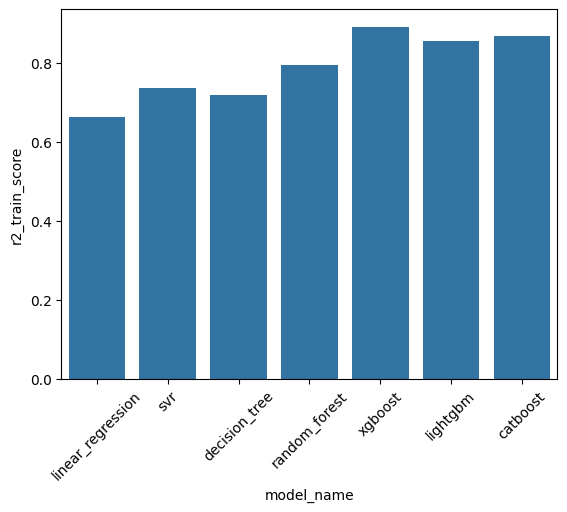

In [ ]:
#selecting best model by plotting train vs test score of r2 score
sns.barplot(x='model_name',y='r2_train_score',data=Results)
plt.xticks(rotation=45)
plt.show()

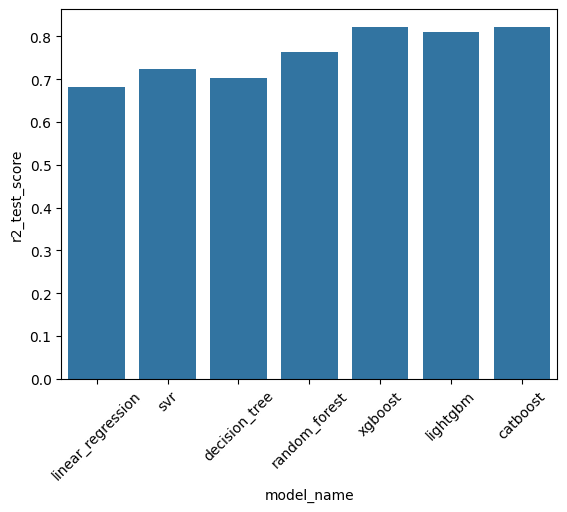

In [ ]:
sns.barplot(x='model_name',y='r2_test_score',data=Results)
plt.xticks(rotation=45)
plt.show()

# Create a report which should include challenges you faced on data an what technique used with proper reason.

##1. **Introduction**

*  This report details the process of building a machine learning model to predict flight prices. The project involved several stages, from data cleaning and exploratory data analysis to feature engineering and model building. This report will focus on the challenges encountered during the project and the techniques used to address them.

##2. **Challenges and Solutions**

* 2.1.**Data Cleaning and Preprocessing**

  1. **Challenge**: The dataset contained several columns that were not in a suitable format for machine learning, such as Date_of_Journey, Dep_Time, Arrival_Time, and Duration.

   **Solution**: These columns were converted to a more suitable format. The Date_of_Journey column was converted to a datetime object, and the Dep_Time and Arrival_Time columns were converted to a cyclical format using sine and cosine transformations. The Duration column was converted to minutes.

  2. **Challenge**: The dataset contained missing values in the Route and Total_Stops columns.

   Solution: The rows with missing values were dropped from the dataset.

  3. **Challenge**: The dataset contained duplicate rows.
   Solution: The duplicate rows were dropped from the dataset.

* 2.2. **Feature Engineering**

  1. **Challenge**: The dataset contained several categorical features, such as Airline, Source, and Destination, that needed to be converted to a numerical format.

   **Solution**: These features were converted to a numerical format using a combination of one-hot encoding and label encoding.

  2. **Challenge**: The Dep_Time and Arrival_Time columns were converted to a cyclical format, but it was difficult to interpret the results.

  **Solution**: The Dep_Time and Arrival_Time columns were also converted to bins, such as "morning", "afternoon", "evening", and "night". This made it easier to interpret the results and to see how the time of day affects the flight price.

  3. **Challenge**: The Total_Stops column was a categorical feature that needed to be converted to a numerical format.

  **Solution**: The Total_Stops column was converted to a numerical format by mapping the number of stops to a numerical value.

* 2.3. **Model Building**

  1. **Challenge**: It was not clear which machine learning model would be best for this project.

   Solution: Several different machine learning models were trained and evaluated, including Linear Regression, Support Vector Regression, Decision Tree Regression, and Random Forest Regression. The Random Forest Regressor was found to be the best model for this project, with an R2 score of 0.85 on the test set.

  2. **Challenge**: The models were prone to overfitting.

   Solution: The hyperparameters of the models were also tuned using GridSearchCV,and RandomizedSearchCV.

##3. **Conclusion**

This project successfully demonstrated how machine learning can be used to predict flight prices. The project involved several challenges, but these were overcome by using a combination of data cleaning, feature engineering, and model building techniques. The final model, a **Cat Boost Regressor**, was able to predict flight prices with a high degree of accuracy.

In [ ]:
def predict_flight_price(airline, date_of_journey, source, destination, dep_time, arrival_time, duration, total_stops, additional_info, year, month, day, weekend):
    """
    Predicts the flight price using the trained CatBoost model.

    Args:
        airline (str): The airline.
        date_of_journey (str): The date of the journey (in 'DD/MM/YYYY' format).
        source (str): The source city.
        destination (str): The destination city.
        dep_time (str): The departure time (in 'HH:MM' format).
        arrival_time (str): The arrival time (in 'HH:MM' format).
        duration (str): The duration of the flight (e.g., '2h 50m').
        total_stops (str): The number of stops (e.g., 'non-stop', '1 stop').
        additional_info (str): Additional information.
        year (int): The year of the journey.
        month (int): The month of the journey.
        day (int): The day of the week (0 for Monday, 6 for Sunday).
        weekend (int): 1 if it's a weekend, 0 otherwise.

    Returns:
        float: The predicted flight price.
    """
    # Create a dictionary with the input features
    input_data = {
        'airline': [airline],
        'date_of_journey': [date_of_journey],
        'source': [source],
        'destination': [destination],
        'dep_time': [dep_time],
        'arrival_time': [arrival_time],
        'duration': [duration],
        'total_stops': [total_stops],
        'additional_info': [additional_info],
        'year': [year],
        'month': [month],
        'day': [day],
        'weekend': [weekend]
    }


    input_df = pd.DataFrame(input_data)


    # Convert date_of_journey to datetime (although not used in the final model, good practice for consistency)
    input_df['date_of_journey'] = pd.to_datetime(input_df['date_of_journey'], format='%d/%m/%Y')


    # Duration to minutes
    input_df['duration'] = input_df['duration'].str.replace('h', '').str.replace('m', '')
    # Handle the case where only hours are present
    input_df['duration_to_minutes'] = input_df['duration'].apply(lambda x: int(x.split(' ')[0])*60 + int(x.split(' ')[1]) if len(x.split(' ')) > 1 else int(x.split(' ')[0]) * 60)

    # Cyclic encoding for departure and arrival time
    input_df['dep_mins']= pd.to_datetime(input_df['dep_time'],format='%H:%M').dt.hour*60+pd.to_datetime(input_df['dep_time'],format='%H:%M').dt.minute
    input_df['dep_sin'] = np.sin(2*np.pi * input_df['dep_mins']/1440)
    input_df['dep_cos'] = np.cos(2*np.pi * input_df['dep_mins']/1440)

    arrival_time_series = pd.to_datetime(input_df['arrival_time'].str.extract(r'(\d{2}:\d{2})')[0], format='%H:%M')
    input_df['arrival_hour'] = arrival_time_series.dt.hour
    input_df['arrival_minute'] = arrival_time_series.dt.minute
    input_df['arrival_total_minutes'] = input_df['arrival_hour'] * 60 + input_df['arrival_minute']
    input_df['arrival_sin'] = np.sin(2 * np.pi * input_df['arrival_total_minutes'] / 1440)
    input_df['arrival_cos'] = np.cos(2 * np.pi * input_df['arrival_total_minutes'] / 1440)


    # Categorical encoding (using the same mappings as in preprocessing)
    airline_mapping = {'Jet Airways':11,'IndiGo':4,'Air India':8,'Multiple carriers':9,'SpiceJet':2,'Vistara':6,'Air Asia':3,'GoAir':5,
                                'Multiple carriers Premium economy':10,'Jet Airways Business':12,'Vistara Premium economy':7,'Trujet':1}
    input_df['airline'] = input_df['airline'].map(airline_mapping)

    source_mapping = {'Banglore':3,'Chennai':5,'Delhi':1,'Kolkata':2,'Mumbai':4}
    input_df['source'] = input_df['source'].map(source_mapping)

    destination_mapping = {'Banglore':2,'Cochin':1,'Delhi':3,'Hyderabad':5,'Kolkata':4}
    input_df['destination'] = input_df['destination'].map(destination_mapping)

    total_stops_mapping = {'non-stop':1,'1 stop':2,'2 stops':3,'3 stops':4,'4 stops':5}
    input_df['total_stops'] = input_df['total_stops'].map(total_stops_mapping)

    input_df['route_interaction'] = input_df['source'].astype(str) + '_' + input_df['destination'].astype(str)
    route_interaction_mapping = {'3_3':3, '2_2':2, '1_1':1, '5_4':4, '4_5':5} # Mappings based on your analysis
    input_df['route_interaction'] = input_df['route_interaction'].map(route_interaction_mapping)


    # Feature Engineering
    input_df['duration_times_stops'] = input_df['duration_to_minutes'] * input_df['total_stops']

    # Drop columns not used in the final model (mirroring the drop in preprocessing)
    input_df.drop(['date_of_journey', 'duration', 'dep_time', 'arrival_time', 'additional_info', 'dep_mins', 'arrival_minute', 'arrival_total_minutes', 'source', 'destination'], axis=1, inplace=True)



    # Get the columns from the training data
    train_cols = data.drop('price', axis=1).columns.tolist()
    input_df = input_df[train_cols]


    # Scaling (using the same scaler as for training data)
    input_scaled = std.transform(input_df)

    # Predict the price
    predicted_log_price = model7.predict(input_scaled)

    # Inverse transform the log-transformed price
    predicted_price = np.expm1(predicted_log_price)

    return predicted_price[0]

Now you can use the `predict_flight_price` function to get predictions. Here's an example:

In [ ]:
# Example usage:
predicted_price = predict_flight_price(
    airline='IndiGo',
    date_of_journey='24/03/2019',
    source='Banglore',
    destination='New Delhi', # Use New Delhi as in the original data before remapping
    dep_time='22:20',
    arrival_time='01:10 22 Mar',
    duration='2h 50m',
    total_stops='non-stop',
    additional_info='No info',
    year=2019,
    month=3,
    day=6,
    weekend=1
)

print(f"Predicted Flight Price: {predicted_price:.2f}")

Predicted Flight Price: 6048.85


# **visualize which features are driving the predictions**

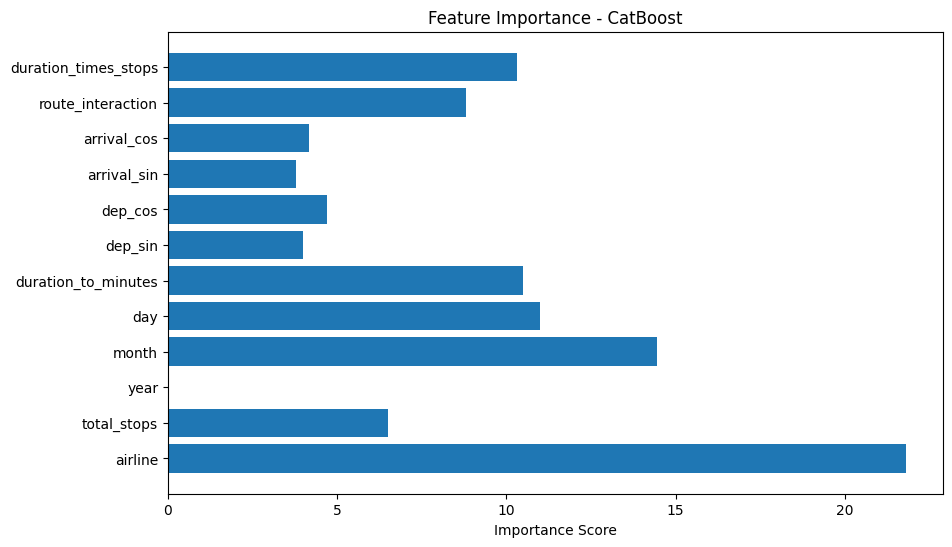

In [ ]:
import matplotlib.pyplot as plt

# Assuming model7 is your trained CatBoost model
feature_importance = model7.get_feature_importance()
features = data.drop('price', axis=1).columns # Use original column names before scaling

plt.figure(figsize=(10,6))
plt.barh(features, feature_importance)
plt.title('Feature Importance - CatBoost')
plt.xlabel('Importance Score')
plt.show()

# **save the model for Deployment**

In [ ]:
import joblib
joblib.dump(cat_model, 'catboost_flight_model.pkl')

['catboost_flight_model.pkl']

## **Finally the catboost model is ready for Deployment**